In [293]:
## imports
#%matplotlib qt
#%matplotlib notebook 
#%matplotlib widget
%matplotlib inline 

# on Rusty use python3/3.7.3 kernel

import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import matplotlib
from matplotlib import cm
import h5py
from math import pi, sqrt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import time
rc('text', usetex=True)
import seaborn as sns
from os import path

from plotly.tools import mpl_to_plotly 

## Import our methods 
from ProcessGeodesics import GetGeodesicTrajectory, GetGeodesicIndices, \
    GetGeodesicsXTurnsIndices, GetGeodesicsXTurnsIndicesGreater, \
    GetTime, GetCameraPosition, GetCameraData, GrabSurfaceIndices

# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3


#plt.style.use('dark_background')


# Final Version

## Plot geodesic trajectories

In [430]:
## Plot geodesic trajectories
def PlotGetTrajectoriesFromH5_ani(p, t_geo, camx=0, camy=0, camz=0, 
                                  xscale=10, yscale=10, zscale=10, 
                                  kerr=False, merge=False, testing=False):
    
    '''
    Args: 
        - p (string): path to the file containing the geodesic data 
        - t_geo (int): define the end point t_geo to plot geodesics up until t = t_geo
        - camx (int): x position of the camera
        - camy (int): y position of the camera
        - camx (int): z position of the camera
        - xscale (int): xlim scale
        - yscale (int): ylim scale 
        - zscale (int): zlim scale
        - kerr: set to True when plotting isolated spinning/nonspinning Kerr BHs
        - merge: set to True when plotting merging BHs
        - testing: set to True to return (fig, ax, xa, ta, tc, t)
    return: 
        - fig: figure window(s)
        - ax: axis params 
    '''

    Indices = GetGeodesicIndices(p, infinity=False)
    print(len(Indices))
    
    # chose the number of geodesics you want to plot
    Indices = Indices[::50]  
    print(Indices)
    cs = sns.color_palette('Paired', n_colors=len(Indices))
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Chose the duration of the Geodesic to plot
    t, x, y, z = GetGeodesicTrajectory(p, 0)
    print('t_geod ranges between: ' + str(int(np.round(t[0])))+ 'M and ' + str(int(np.round(t[len(t)-1]))) +'M')
    #t_geo = input('t_geod:')
    print('t_geod = ' + str(t_geo))
    
    # Set up figure labels
    ax.set_xlabel('x/M',labelpad=20)
    ax.set_ylabel('y/M', labelpad=20)
    ax.set_zlabel('z/M', labelpad=20)
    
    # Plot Kerr BH Grid
    if kerr == True: 
                # draw sphere
        R = 2. # R_s
        #R=1. # R_s
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j] # change xj to improve resolution 
        x = R*np.cos(u)*np.sin(v)
        y = R*np.sin(u)*np.sin(v)
        z = R*np.cos(v)
        ax.plot_wireframe(x, y, z, color="k", alpha = 1, linewidth = .5, label = 'Event Horizon', linestyle=':')
        ax.scatter([0], [0], [0], s = 100., color = 'k', label='Singularity')
        
        for n, color in zip(Indices, cs):
            t, x, y, z = GetGeodesicTrajectory(p, n)
            inds_animate = np.where(np.array(t) <= int(t_geo)*1.)[0]
            ax.plot(x[inds_animate], y[inds_animate], z[inds_animate], '-', lw = 2.5, color = 'red')
                
    # Plot Mergeing Aparent Horizons
    if merge == True:
        # Load Binary BH Data
        ta, xa, ya, za = np.loadtxt('/mnt/ceph/users/ledmond/HeadOnLensing/Trajectory_AhA.dat', comments="#",usecols=([0,1,2,3]),unpack=True) # AhA
        tb, xb, yb, zb = np.loadtxt('/mnt/ceph/users/ledmond/HeadOnLensing/Trajectory_AhB.dat', comments="#",usecols=([0,1,2,3]),unpack=True) # AhB
        tc, xc, yc, zc = np.loadtxt('/mnt/ceph/users/ledmond/HeadOnLensing/Trajectory_AhC.dat', comments="#",usecols=([0,1,2,3]),unpack=True) # AhC
        t_animate = t_geo
        inda = np.where(ta <= int(t_animate)*1.)[0]
        indb = np.where(tb <= int(t_animate)*1.)[0]
        indc = np.where(tc <= int(t_animate)*1.)[0]
        # to make sure the plot is centered around AhZ correctly
        
        #ax.set_xlim(-10,10)
        ax.scatter(xc, yc, zc, s = 0.0001, color = 'k', alpha = 0.01)
    
        # Actually plot the Geodesics
        for n, color in zip(Indices, cs):
            t, x, y, z = GetGeodesicTrajectory(p, n)
            inds_animate = np.where(np.array(t) <= int(t_geo)*1.)[0]
            ax.plot(x[inds_animate], y[inds_animate], z[inds_animate], '-', lw = 2.5, color = 'red')
            ax.plot(x, y, z, '-', lw = 0.0, color = 'white')
        
        if np.round(int(t_geo)) == np.round(max(t)-5):
            ax.scatter(xa[len(xa)-5], ya[len(ya)-5], za[len(za)-5], s = 700, color = 'k', label = 'Apparent Horizons') 
            ax.scatter(xb[len(xb)-5], yb[len(yb)-5], zb[len(zb)-5], s = 700, color = 'k')             
        elif np.round(int(t_geo)) == np.round(max(t)-4):
            ax.scatter(xa[len(xa)-4], ya[len(ya)-4], za[len(za)-4], s = 700, color = 'k', label = 'Apparent Horizons') 
            ax.scatter(xb[len(xb)-4], yb[len(yb)-4], zb[len(zb)-4], s = 700, color = 'k')             
        elif np.round(int(t_geo)) == np.round(max(t)-3):
            ax.scatter(xa[len(xa)-3], ya[len(ya)-3], za[len(za)-3], s = 700, color = 'k', label = 'Apparent Horizons') 
            ax.scatter(xb[len(xb)-3], yb[len(yb)-3], zb[len(zb)-3], s = 700, color = 'k')             
        elif np.round(int(t_geo)) == np.round(max(t)-2):
            ax.scatter(xa[len(xa)-2], ya[len(ya)-2], za[len(za)-2], s = 700, color = 'k', label = 'Apparent Horizons') 
            ax.scatter(xb[len(xb)-2], yb[len(yb)-2], zb[len(zb)-2], s = 700, color = 'k') 
        elif np.round(int(t_geo)) >= np.round(max(t)):
            ax.scatter(xc[len(xc)-1],yc[len(yc)-1], zc[len(zc)-1], s = 900, color = 'k', label = 'Final Horizon')
        else:
            # To plot AhA and AhB as points
            ax.scatter(xa[inda[len(inda)-1:]], ya[inda[len(inda)-1:]], za[inda[len(inda)-1:]], s = 700, label = 'Apparent Horizons', color = 'k', alpha=1)
            ax.scatter(xb[indb[len(indb)-1:]], yb[indb[len(indb)-1:]], zb[indb[len(indb)-1:]] , s = 700, color = 'k', alpha=1)
        
    # Plot Camera
    ax.scatter([int(camx)], [int(camy)], [int(camz)], s = 50, color = 'blue', label = 'Observer')
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis._axinfo['tick']['inward_factor'] = 0
    ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.yaxis._axinfo['tick']['inward_factor'] = 0
    ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.zaxis._axinfo['tick']['inward_factor'] = 0
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
    
    ax.set_xlim(int(xscale)*-1, abs(int(xscale)))
    ax.set_ylim(int(yscale)*-1, abs(int(yscale)) )
    ax.set_zlim(int(zscale)*-1, abs(int(zscale)) )
    
    plt.legend()
    plt.tight_layout()
    plt.show()
  
    if testing == True:
        return fig, ax, xa, ta, tc, t
    
    return fig, ax

In [396]:
p_kerr = '/mnt/ceph/users/ledmond/KerrGeodesics/Kerr'
p_merge = '/mnt/ceph/users/ledmond/HeadOnLensing/Animation1' # Cam 10
p_merge_tst = '/mnt/ceph/users/ledmond/HeadOnLensing/BinaryMerger_tst'
p_merge_cam50 = '/mnt/ceph/users/ledmond/HeadOnLensing/BinaryMerger_Cam50'
p_merge_cam20 = '/mnt/ceph/users/ledmond/HeadOnLensing/BinaryMerger_Cam20'
p_merge_cam15 = '/mnt/ceph/users/ledmond/HeadOnLensing/BinaryMerger_Cam15'
p_merge_edgeon_tst = '/mnt/ceph/users/ledmond/HeadOnLensing/EdgeOnMerger_tst'
p_ani = '/mnt/ceph/users/ledmond/HeadOnLensing/AniTest'

p_merge_edgeon_cam_n25 = '/mnt/ceph/users/ledmond/HeadOnLensing/EdgeOnMerger'
p_merge_topdown_cam_z100 = '/mnt/ceph/users/ledmond/HeadOnLensing/TopDownMerger'
p_kerr_edgeon = '/mnt/ceph/users/ledmond/KerrGeodesics/EdgeOnKerr'
p_kerr_int = '/mnt/ceph/users/ledmond/KerrGeodesics/InterestingGeosKerr'

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 160


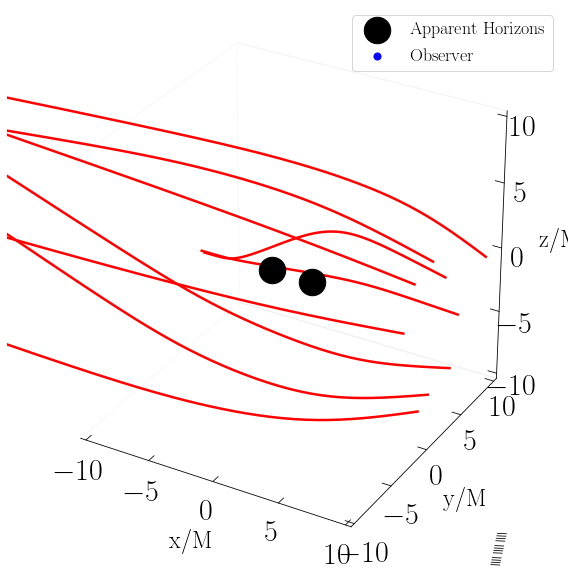

In [435]:
fig, ax = PlotGetTrajectoriesFromH5_ani(p_merge_edgeon_cam_n25,160, merge=True, camx=25)

In [433]:
def animate_geos(p, times, file, type_of_bh,camx=100, camy=0, camz=0, xscale=10, yscale=10, zscale=10):
    
    '''
    Args: 
        - p: file containing BH geodesic data
        - times (array): array of times to plot each geodesics at times[i]
        - file (string): name of the file you want to save images
        - type_of_bh (string): input either 'kerr' or 'merge' to plot either a kerr bh or a merging bh event (case sentive w.r.t. the first letter)
        - camx (int): x position of the camera
        - camy (int): y position of the camera
        - camx (int): z position of the camera
        - xscale (int): xlim scale
        - yscale (int): ylim scale 
        - zscale (int): zlim scale
        
    return: 
        - Does not return anything in particular
        - Simply saves the .png figures in the given file
    '''
    
    if type_of_bh == 'Kerr' or type_of_bh == 'kerr':
        for t, i in zip(times, np.arange(len(times))):
            fig,ax = PlotGetTrajectoriesFromH5_ani(p, t_geo, camx=camx, camy=camy, camz=camz, xscale=xscale, yscale=yscale, zscale=zscale, kerr=True)
            if i < 10: 
                fig.savefig(str(file) + '/frame_000' + str(i) + '.png')
            if i >= 10:
                fig.savefig(str(file) + '/frame_00' + str(i) + '.png')
            if i>=10 and i >=100:
                fig.savefig(str(file) + '/frame_0' + str(i) + '.png')
                
    if type_of_bh == 'merge' or type_of_bh == 'Merge':
        for t, i in zip(times, np.arange(len(times))):
            fig,ax = PlotGetTrajectoriesFromH5_ani(p, t, camx=camx, camy=camy, camz=camz, xscale=xscale, yscale=yscale, zscale=zscale, merge=True)
            if i < 10: 
                fig.savefig(str(file) + '/frame_000' + str(i) + '.png')
            if i >= 10:
                fig.savefig(str(file) + '/frame_00' + str(i) + '.png')
            if i>=10 and i >=100:
                fig.savefig(str(file) + '/frame_0' + str(i) + '.png')
                

In [434]:
t_kerr = np.arange(1910, 2010)
t_merge = np.arange(44, 190)
len(t_kerr), len(t_merge), t_kerr

(100,
 146,
 array([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
        1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
        1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
        1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
        1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
        1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
        1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
        1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
        1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
        2009]))

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 44


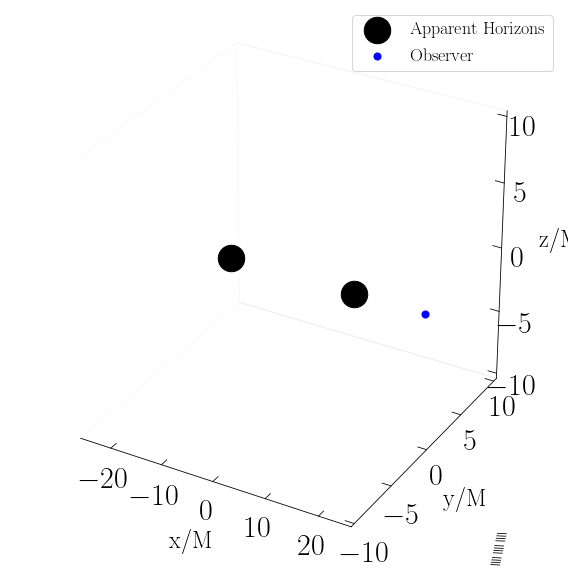

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 45


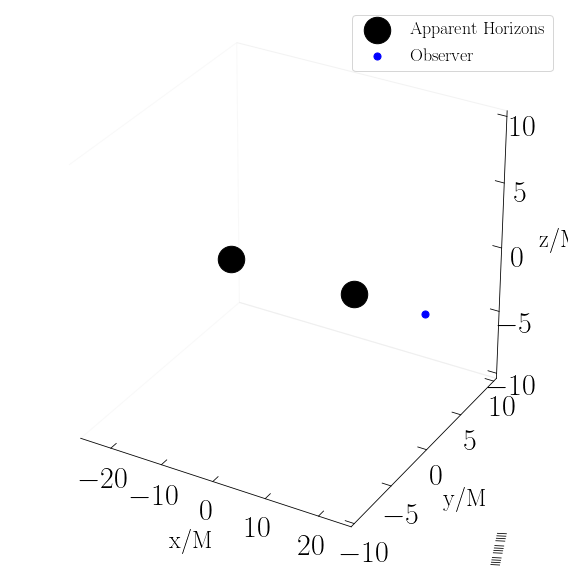

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 46


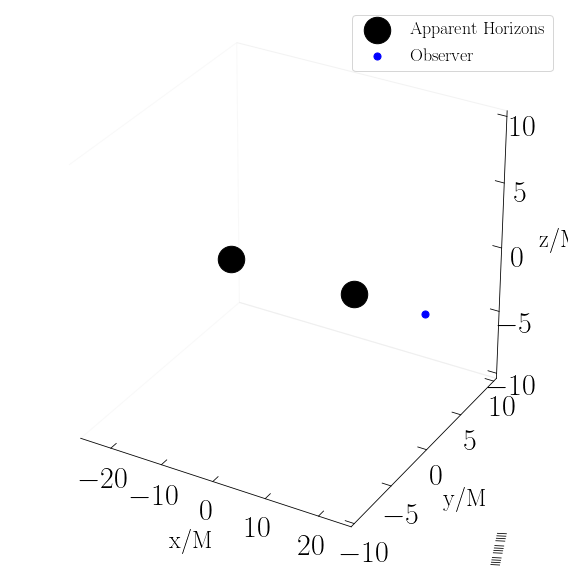

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 47


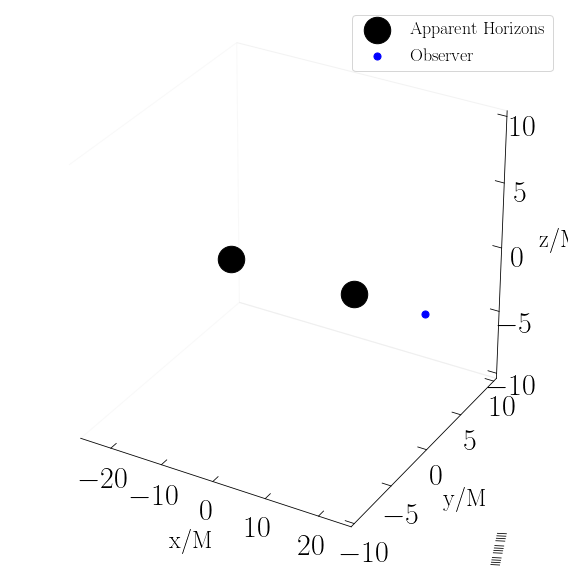

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 48


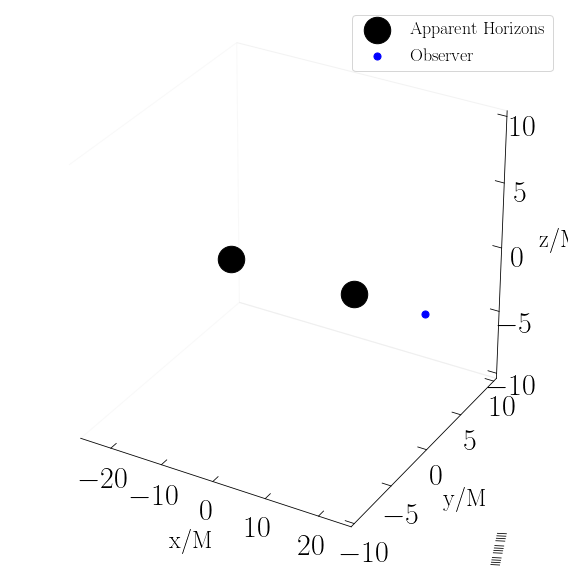

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 49


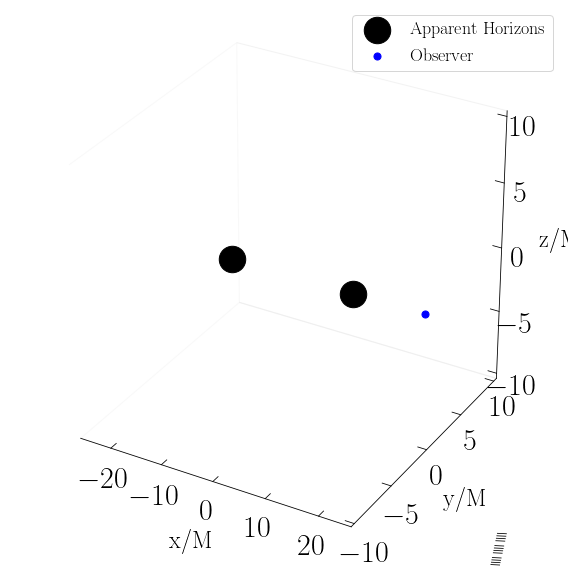

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 50


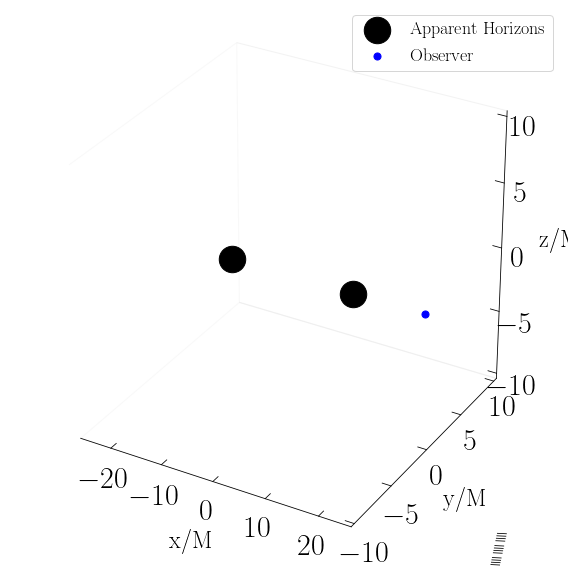

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 51


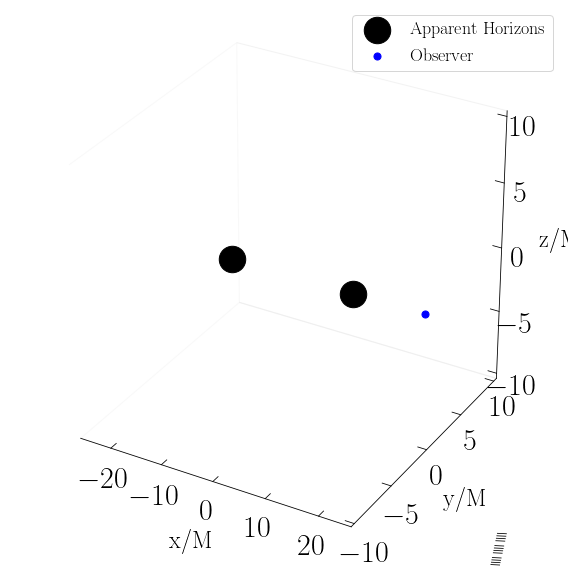

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 52


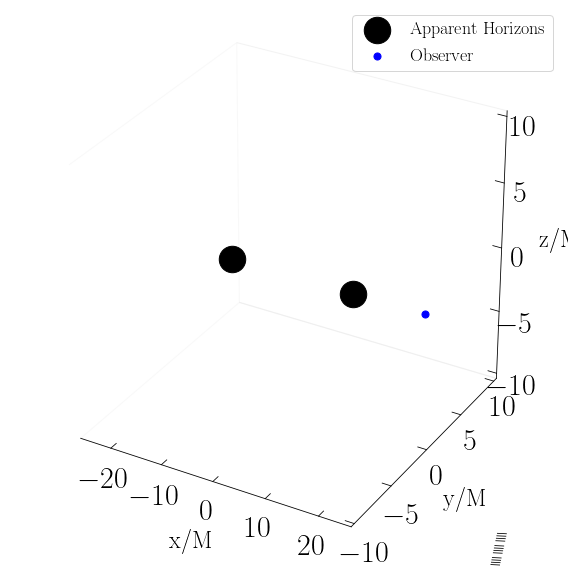

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 53


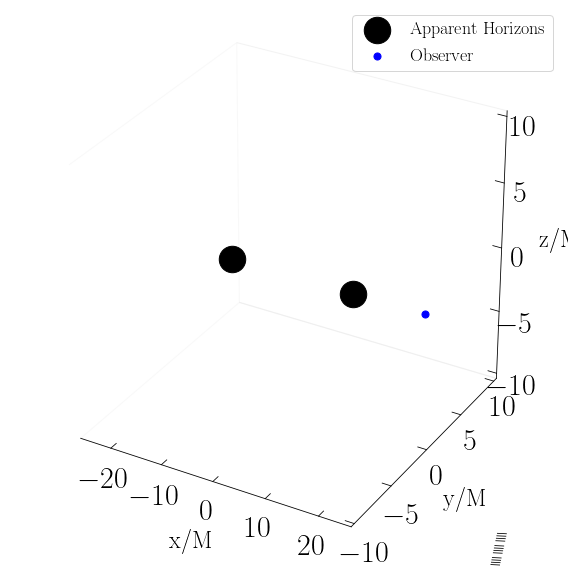

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 54


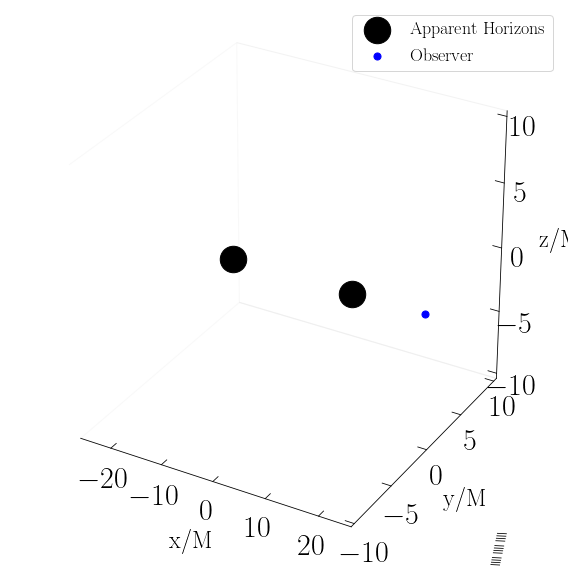

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 55


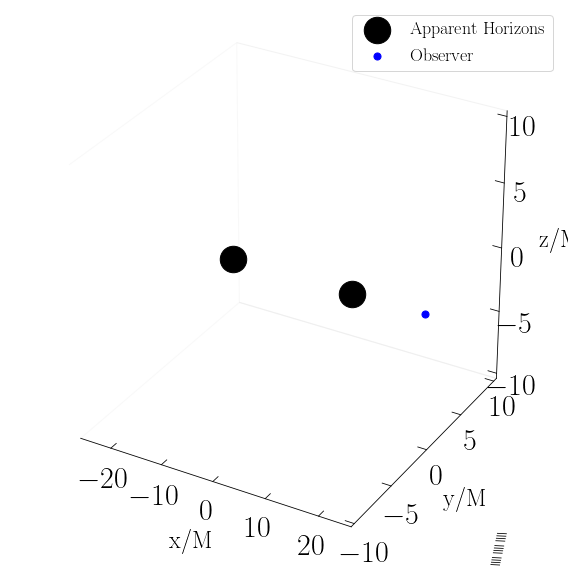

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 56


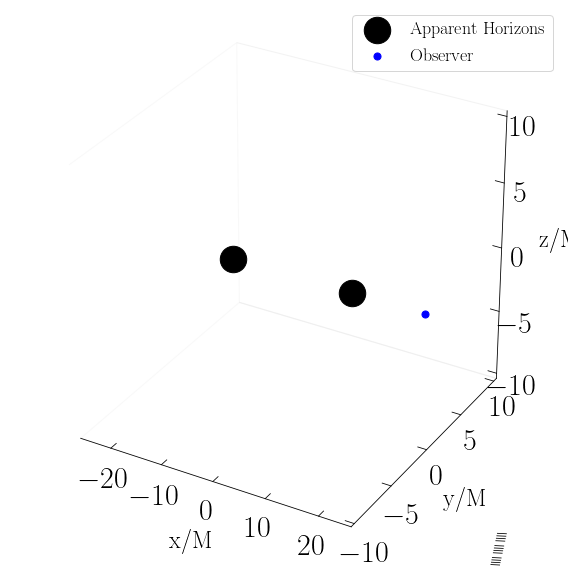

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 57


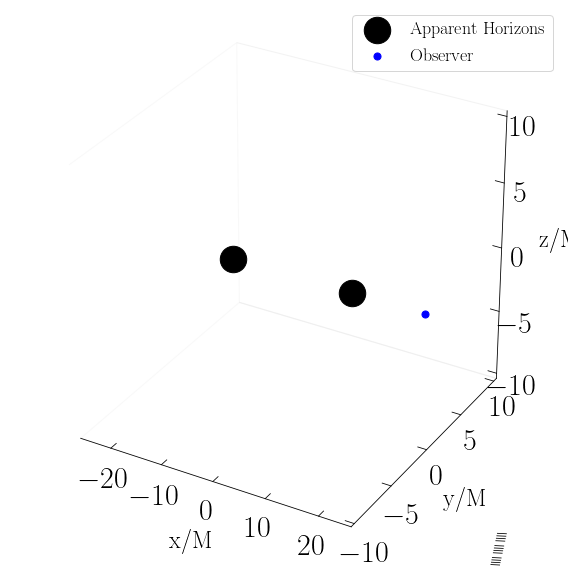

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 58


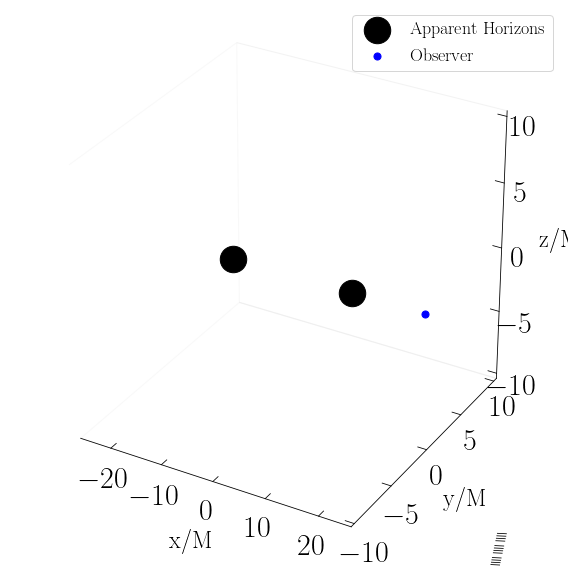

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 59


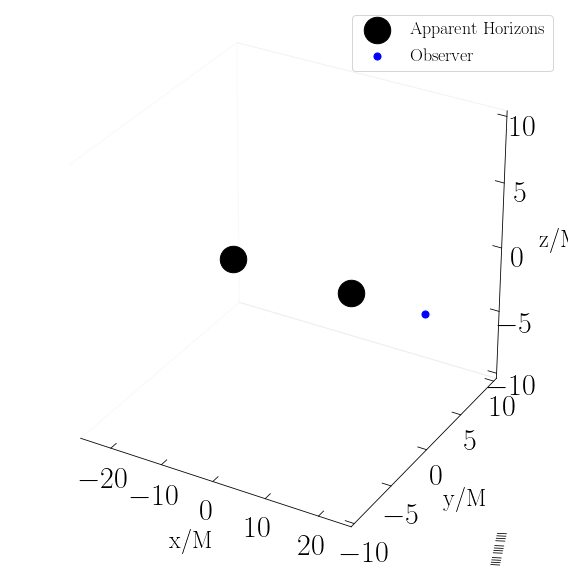

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 60


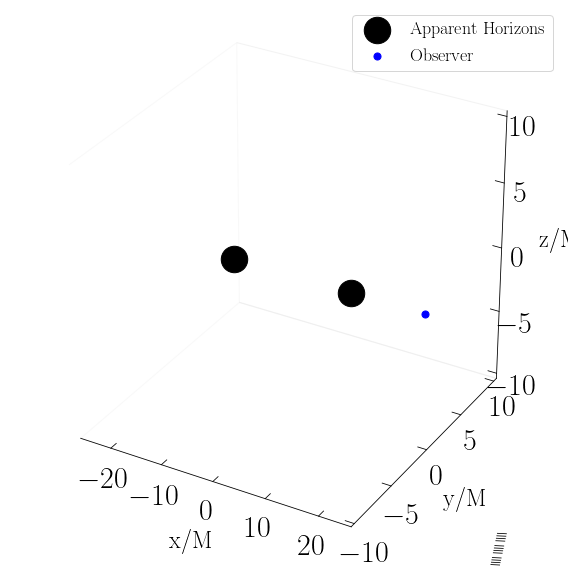

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 61


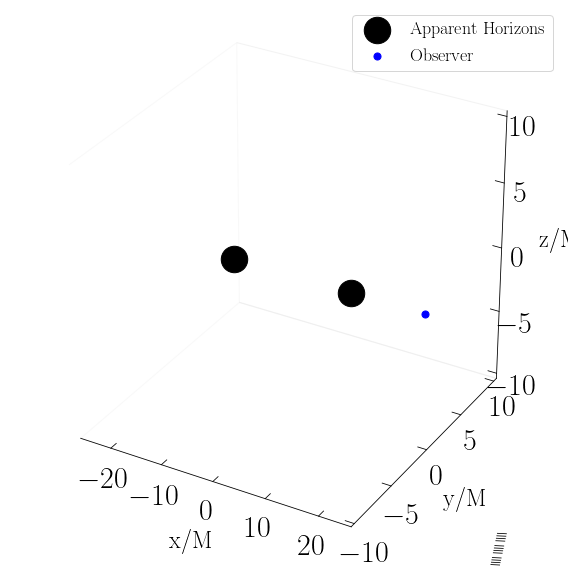

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 62


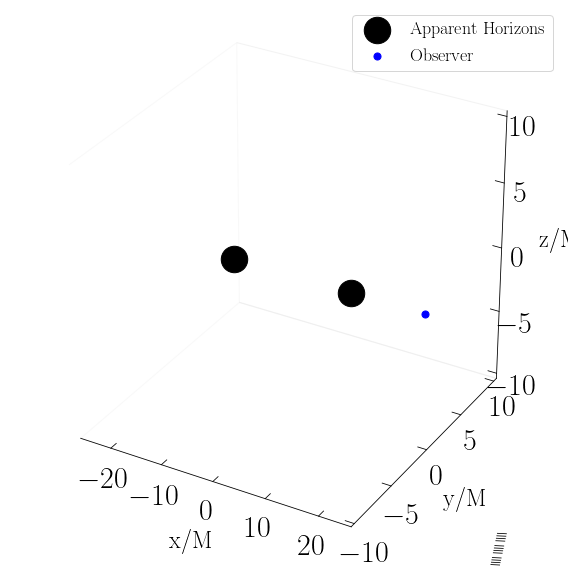

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 63


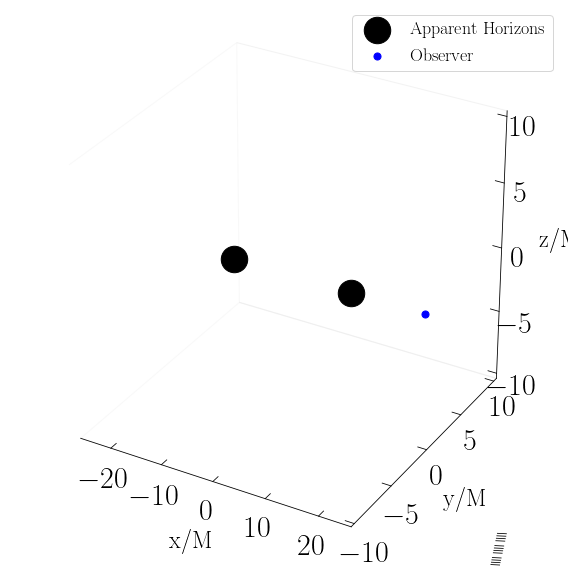

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 64


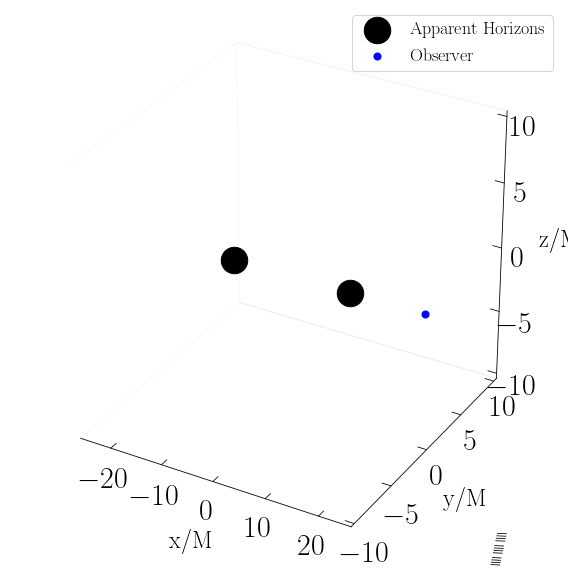

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 65


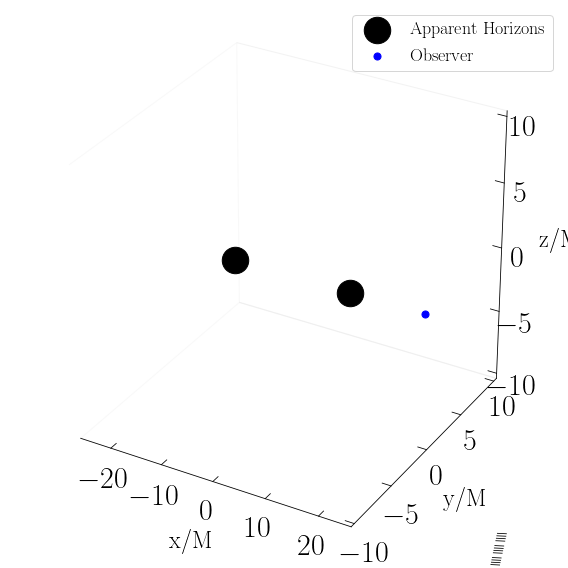

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 66


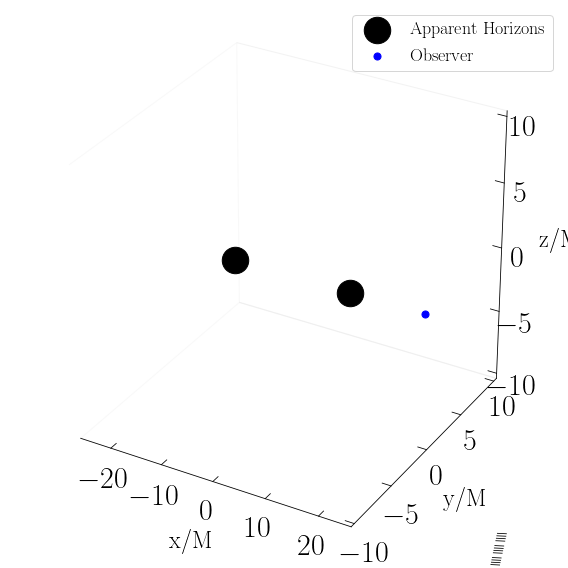

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 67


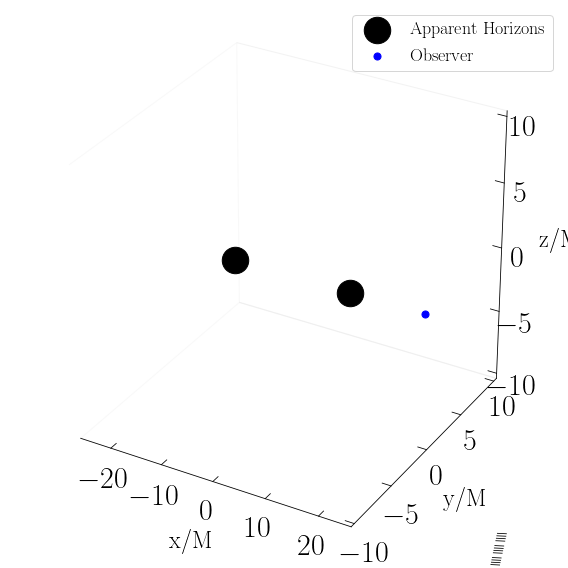

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 68


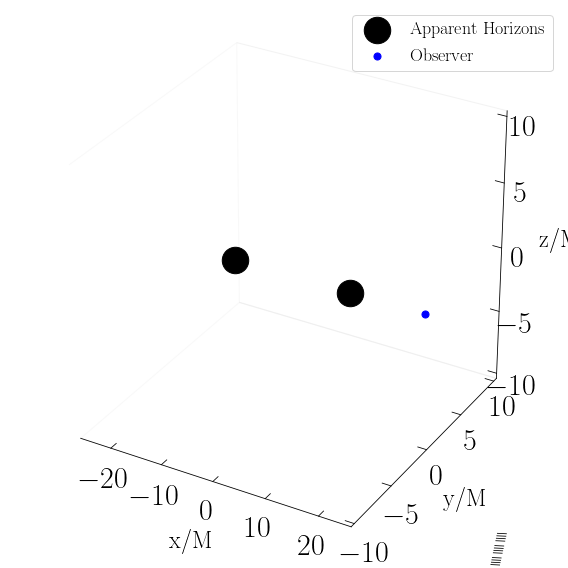

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 69


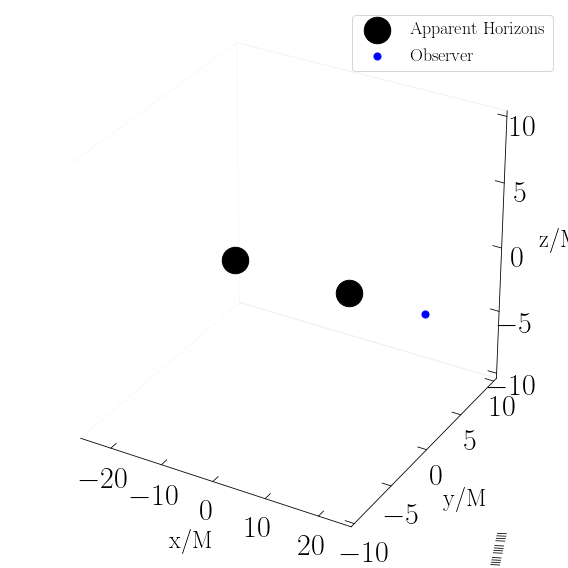

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 70


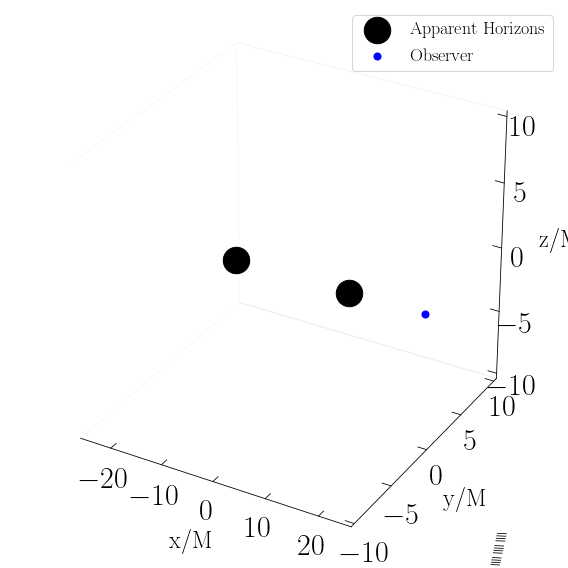

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 71


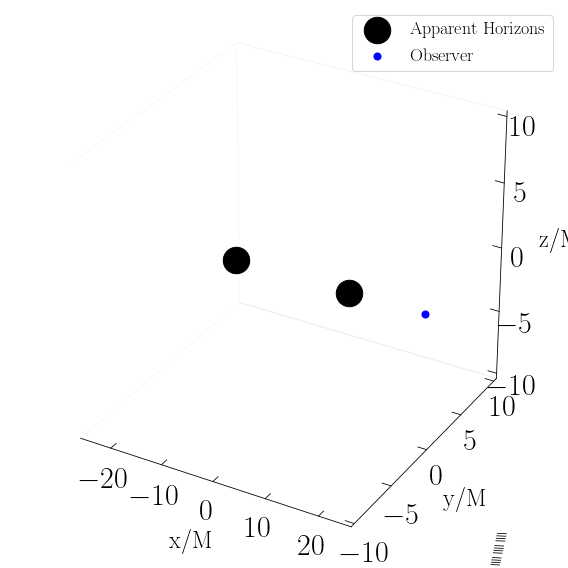

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 72


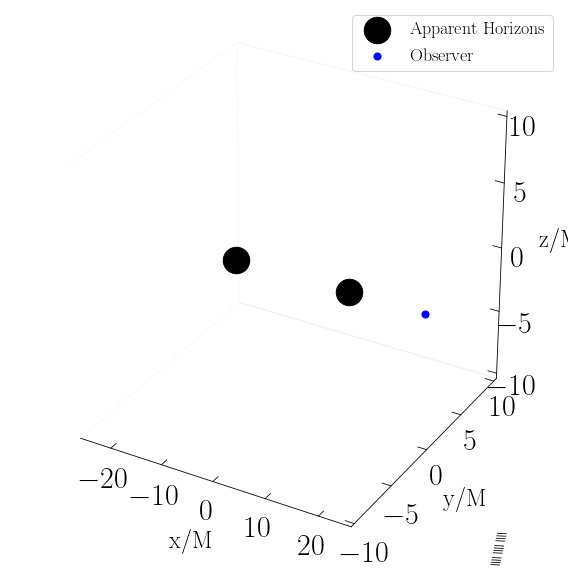

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 73


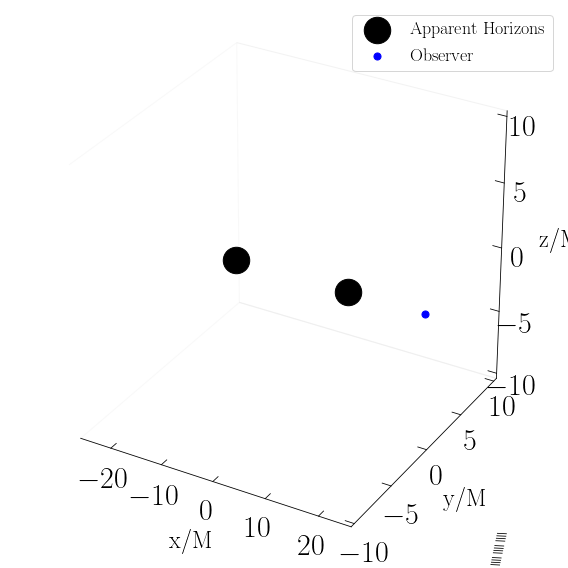

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 74


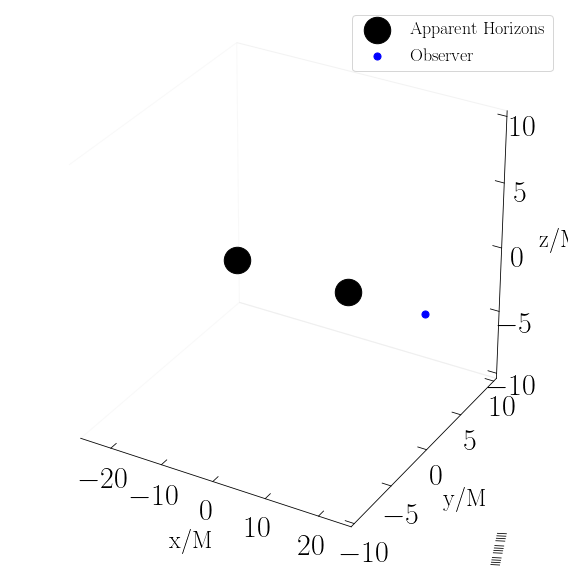

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 75


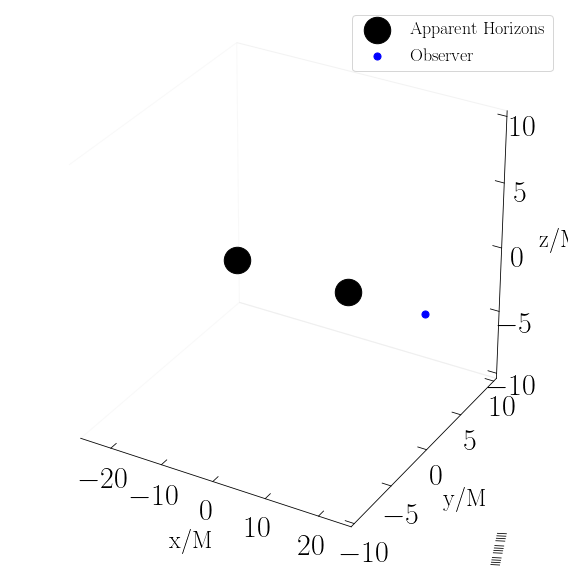

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 76


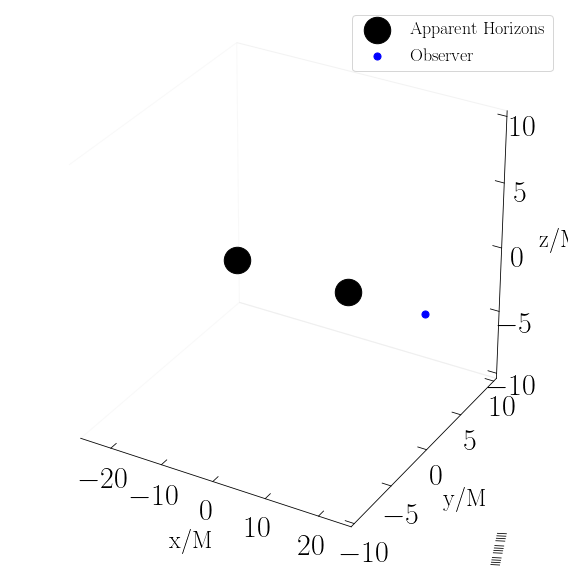

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 77


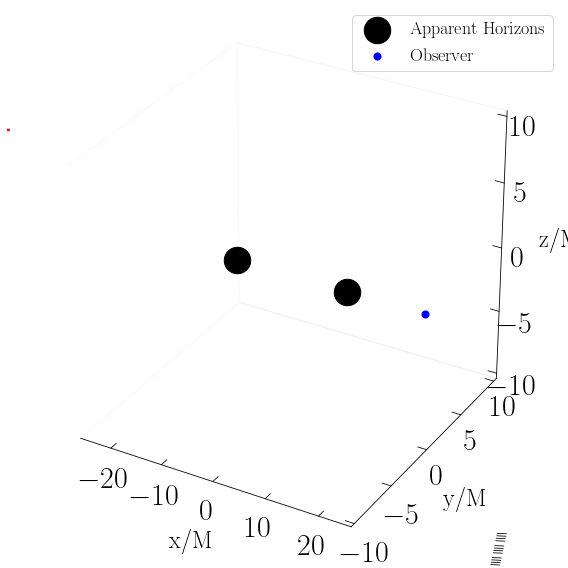

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 78


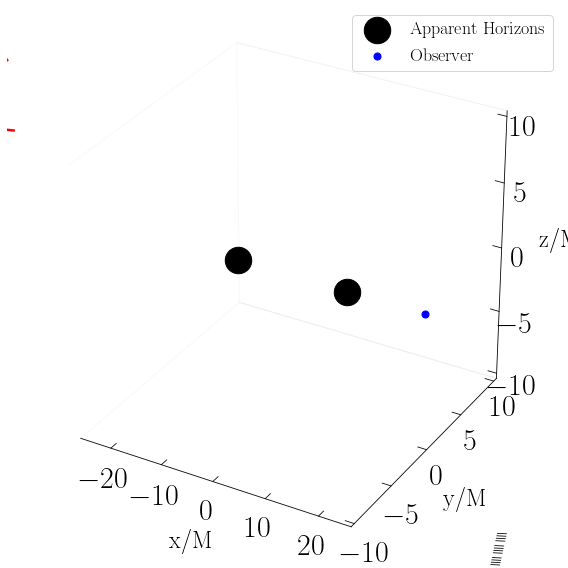

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 79


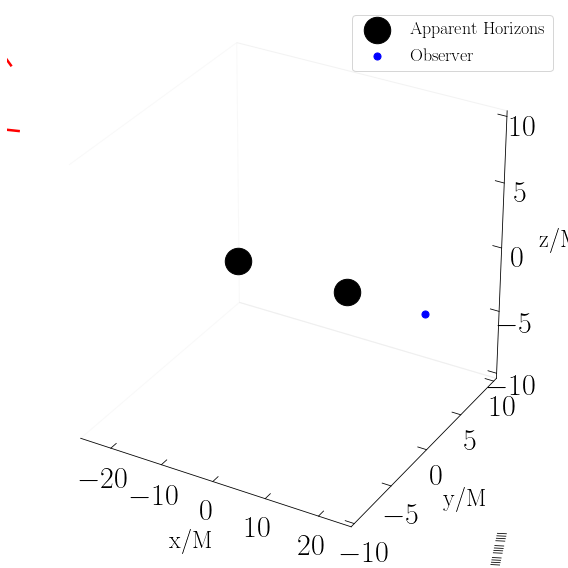

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 80


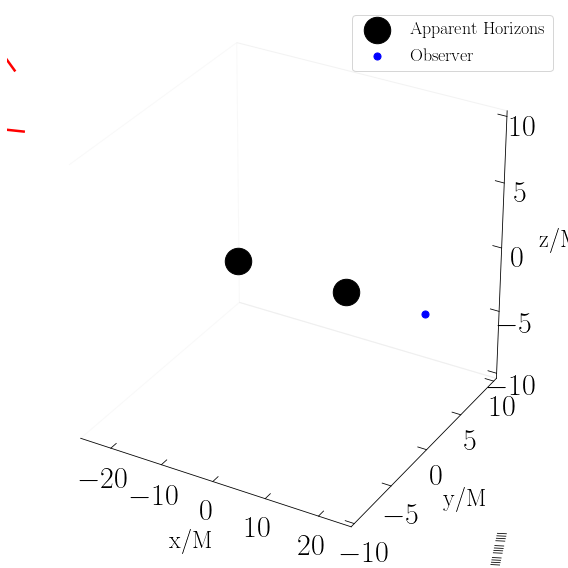

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 81


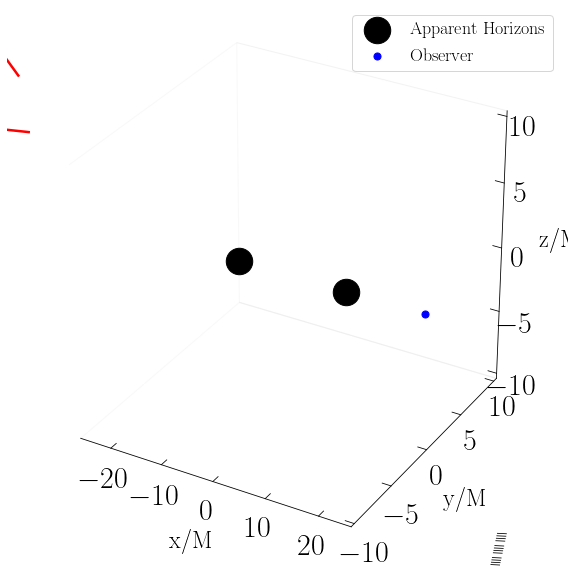

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 82


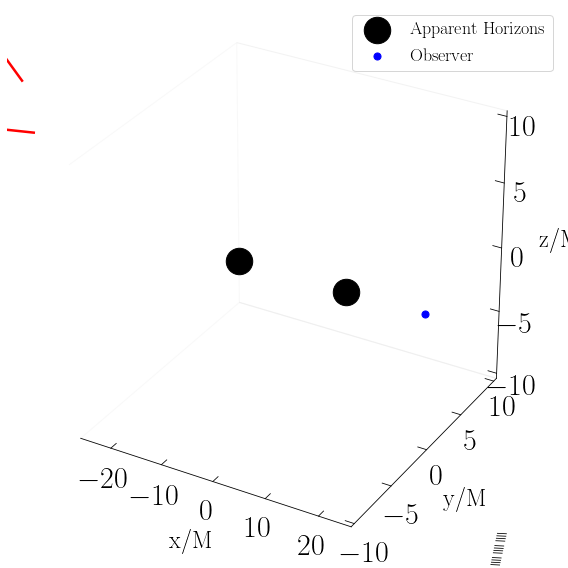

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 83


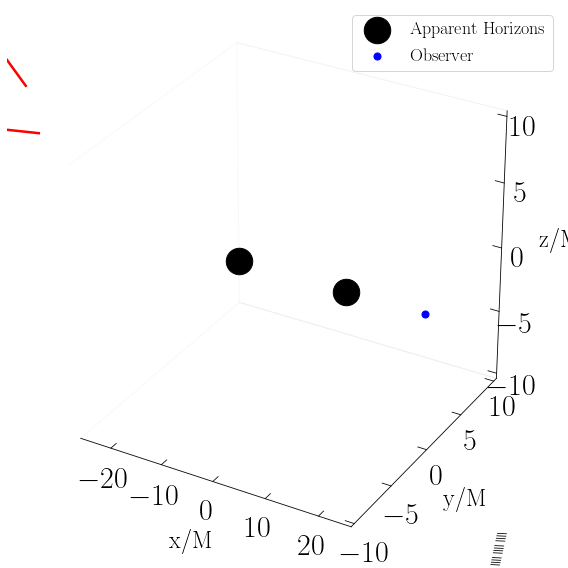

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 84


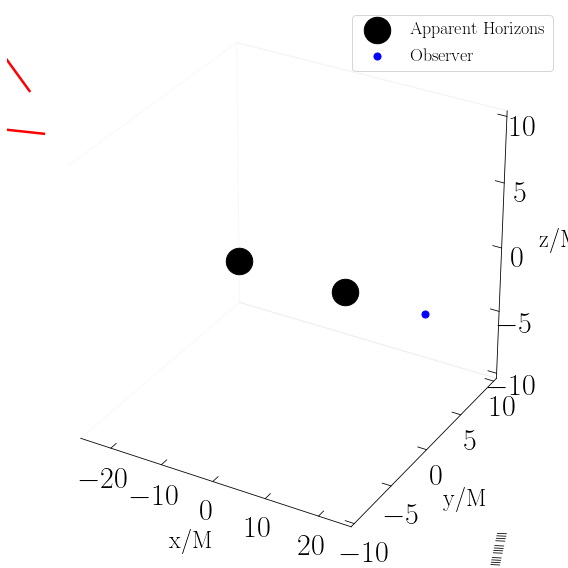

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 85


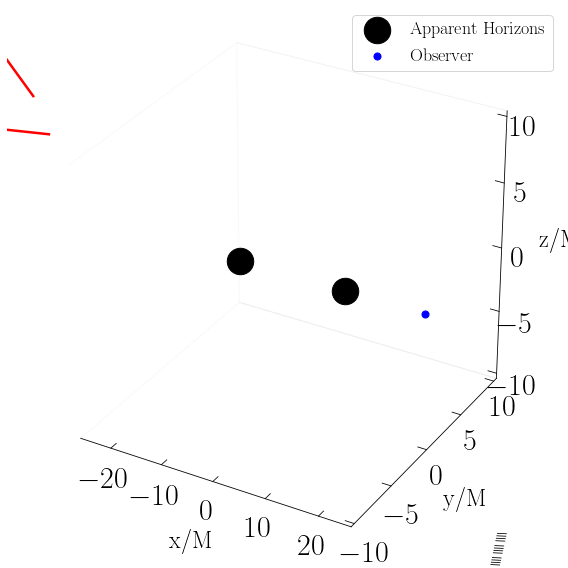

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 86


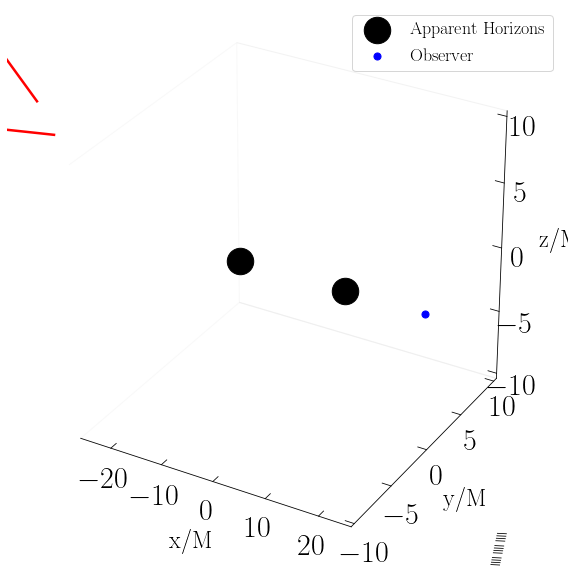

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 87


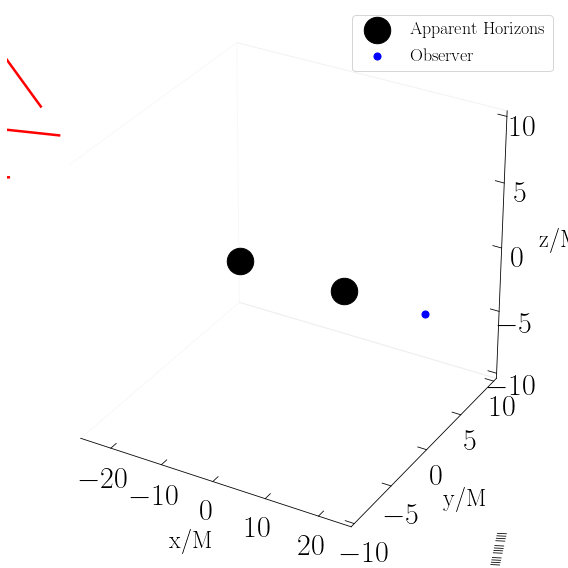

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 88


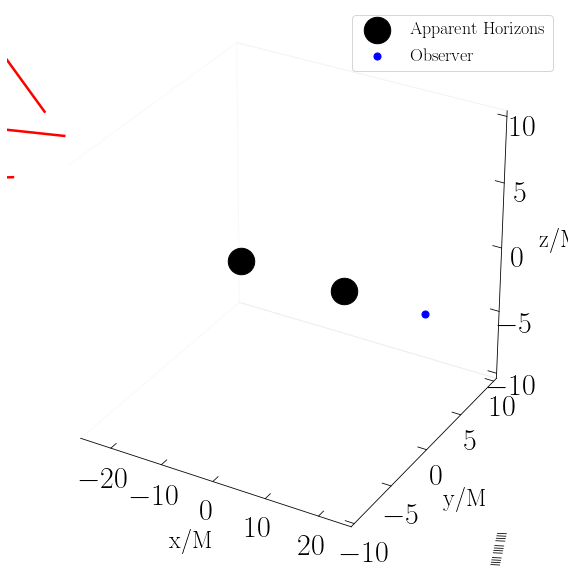

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 89


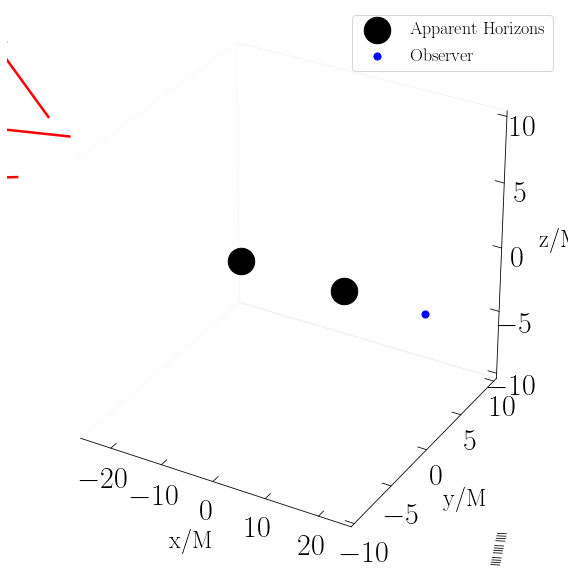

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 90


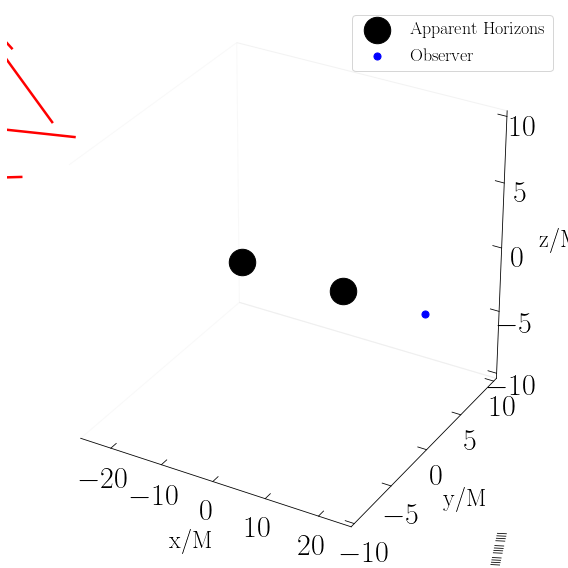

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 91


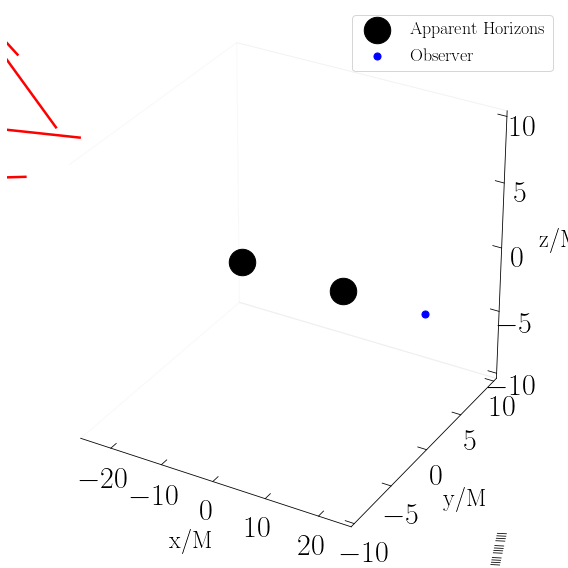

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 92


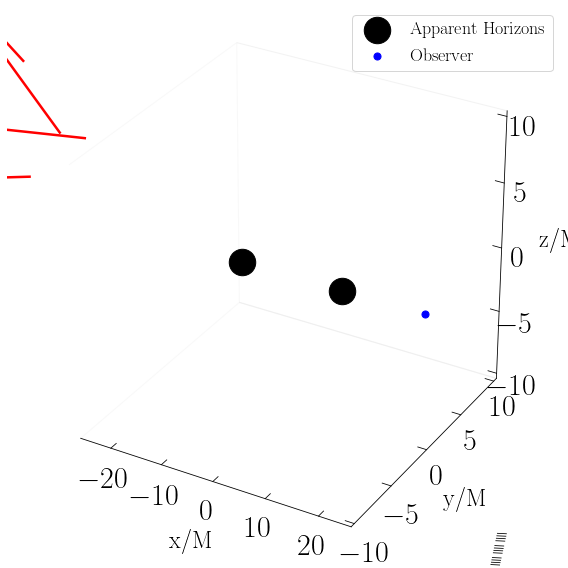

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 93


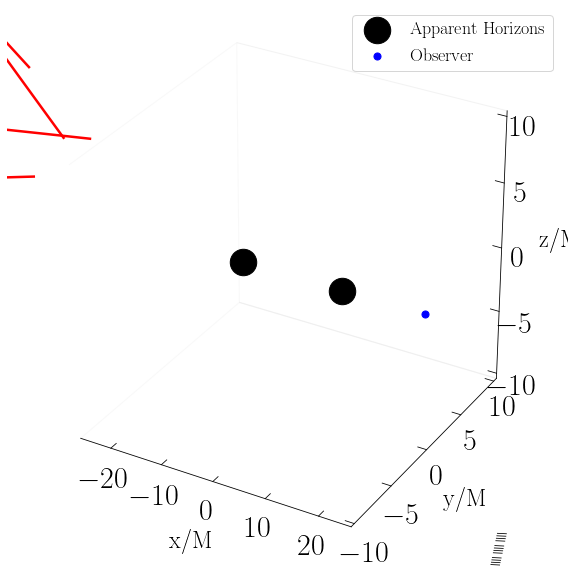

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 94


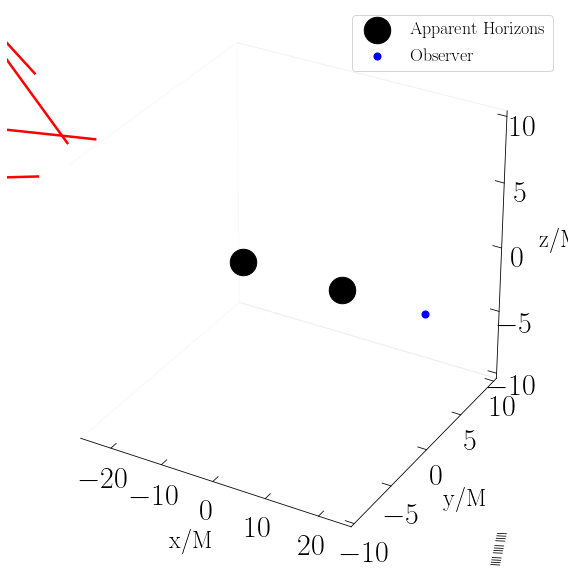

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 95


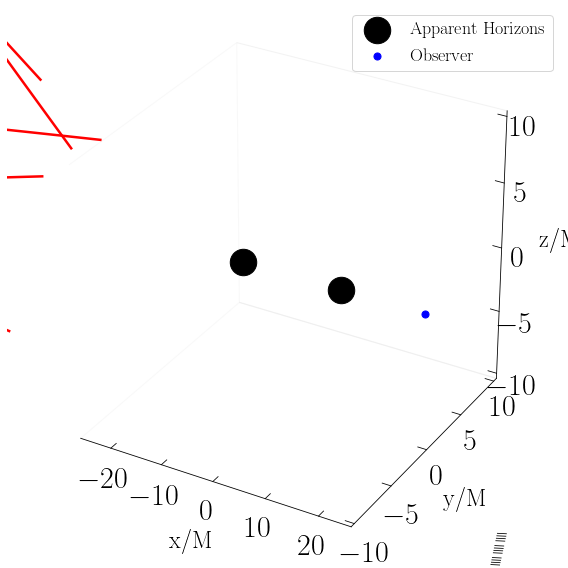

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 96


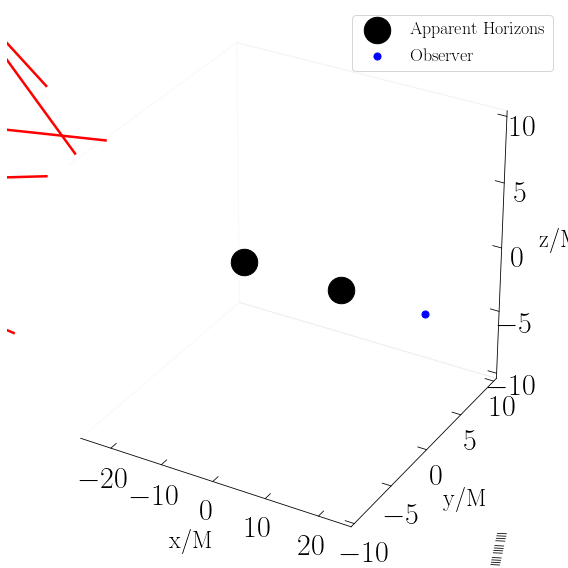

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 97


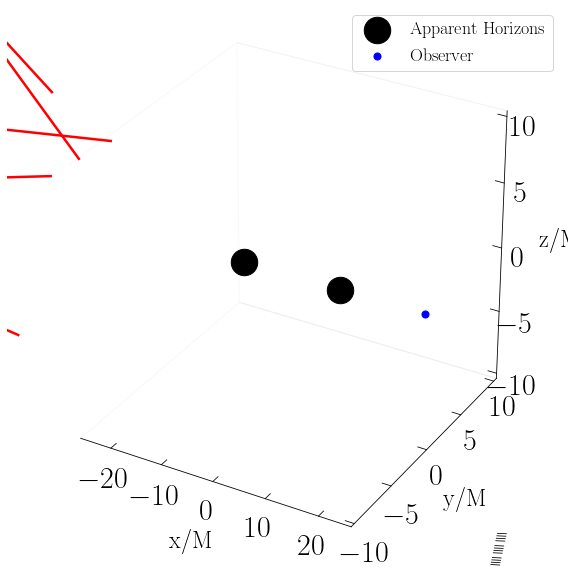

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 98


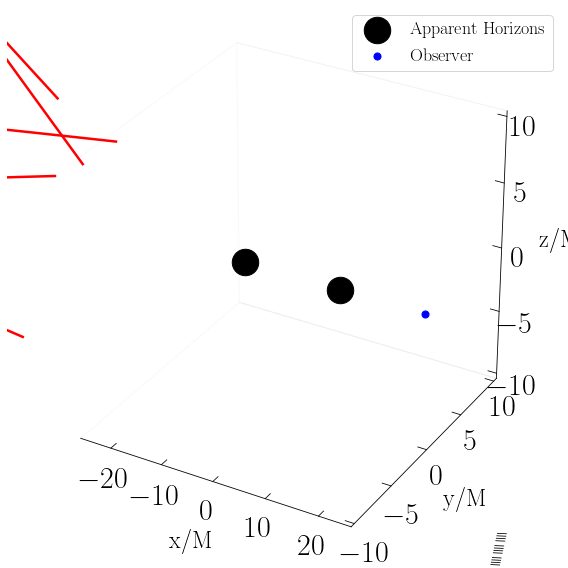

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 99


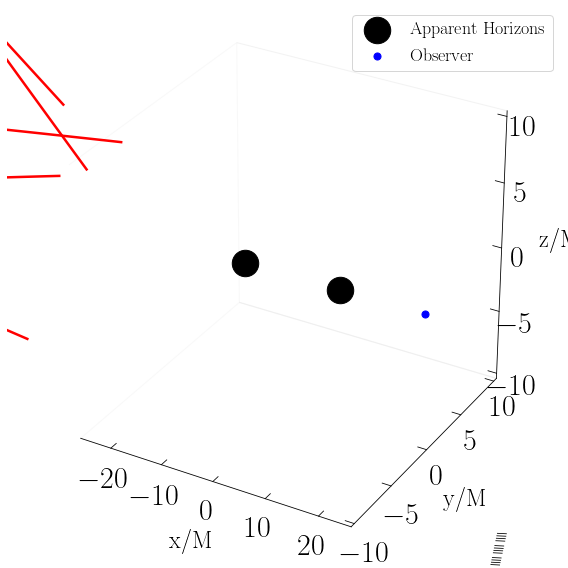

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 100


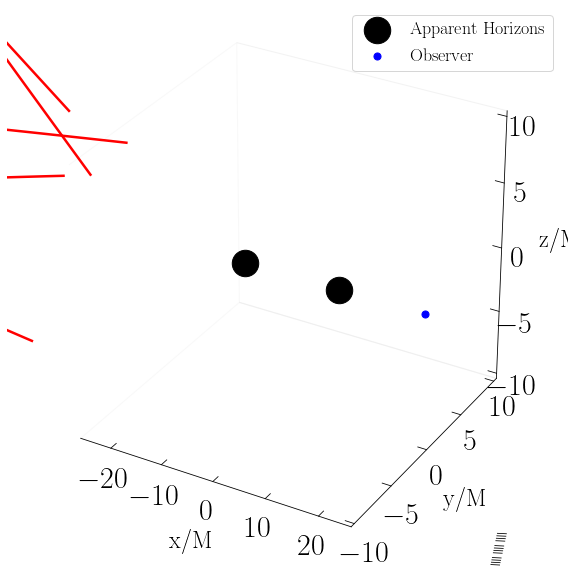

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 101


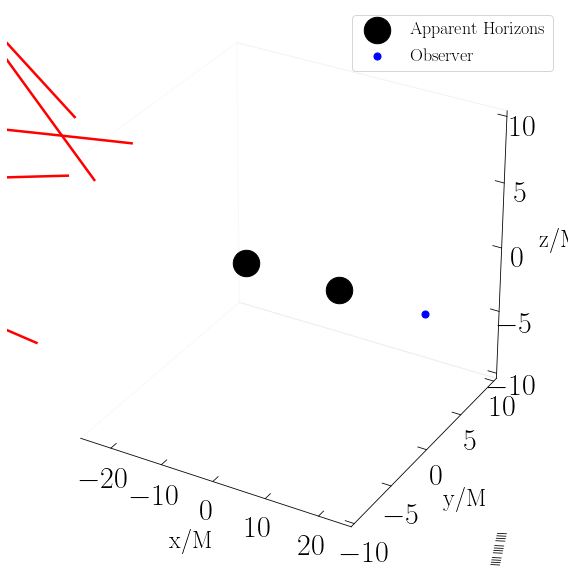

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 102


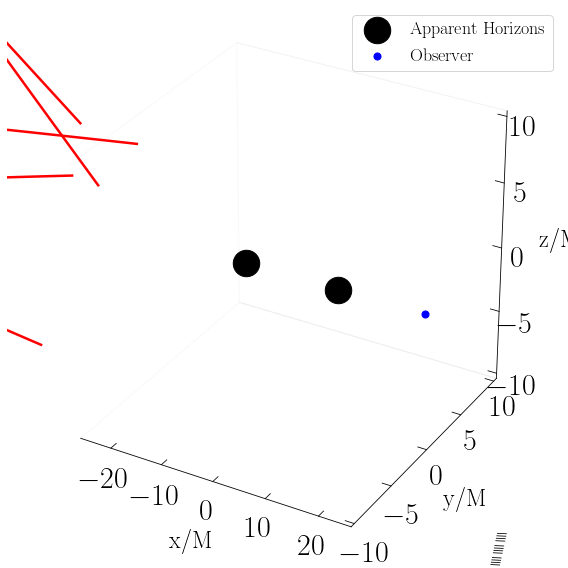

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 103


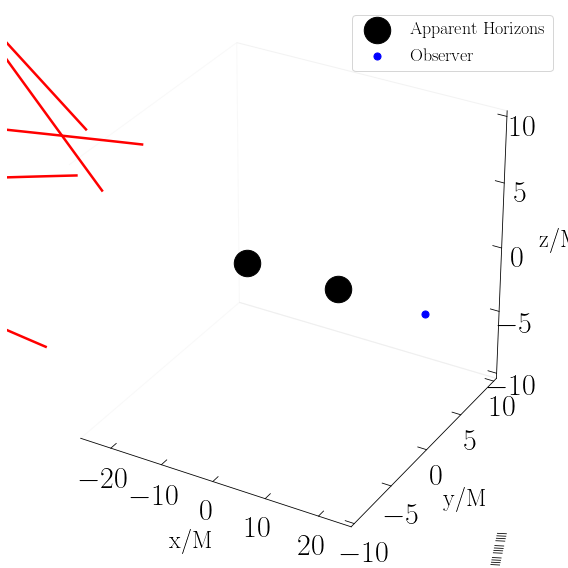

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 104


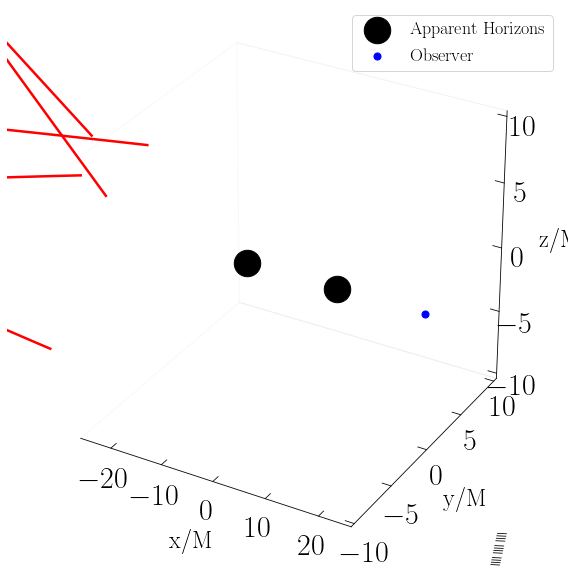

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 105


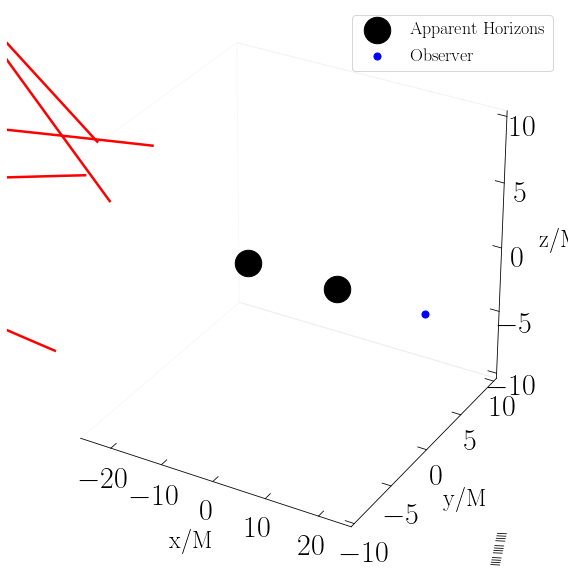

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 106


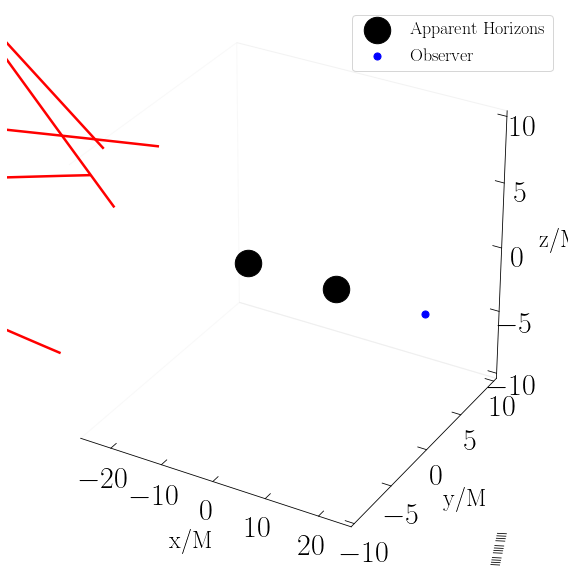

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 107


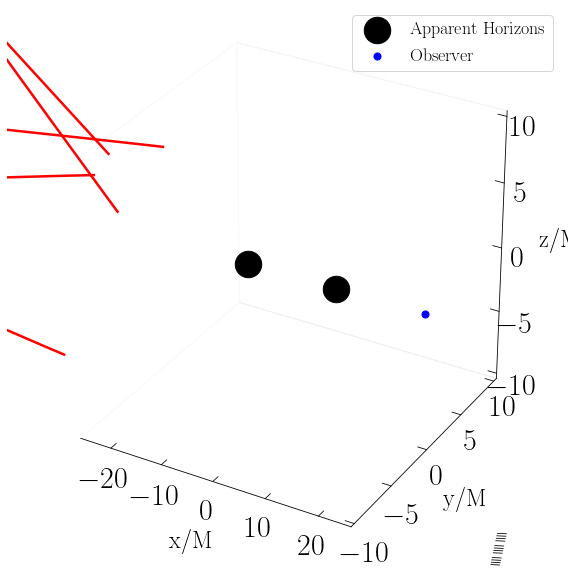

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 108


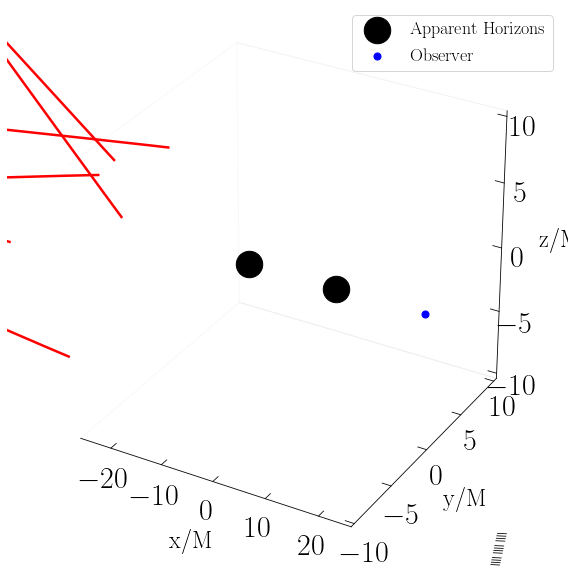

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 109


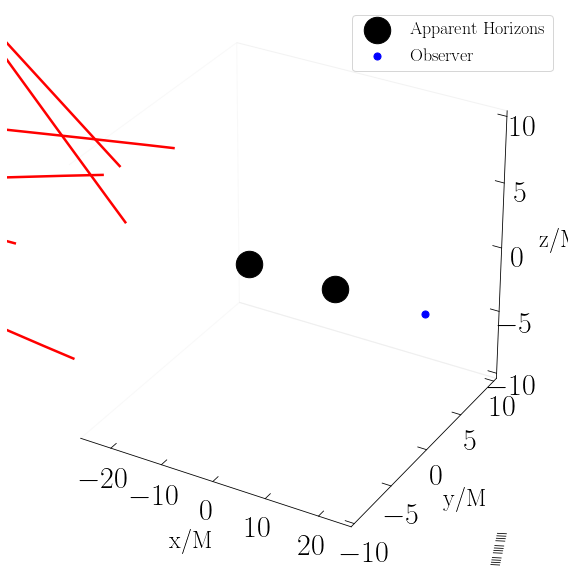

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 110


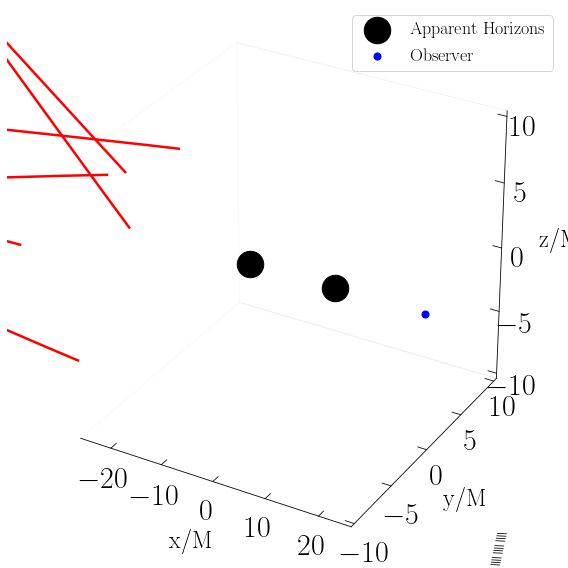

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 111


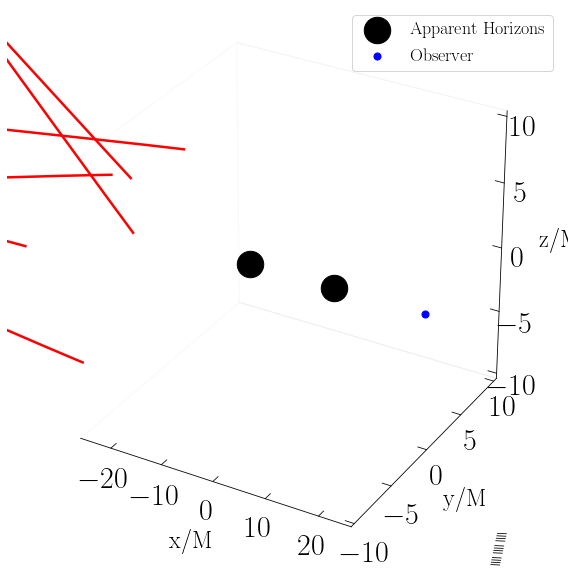

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 112


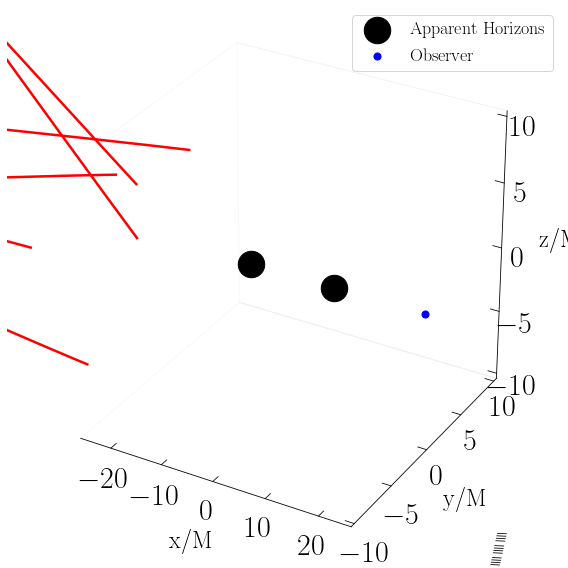

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 113


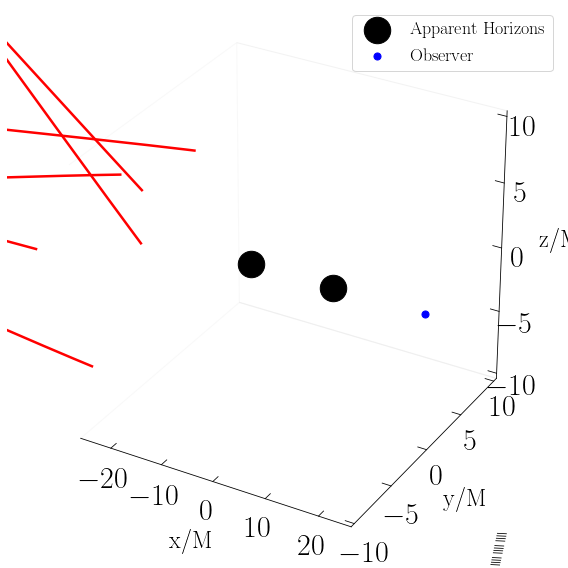

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 114


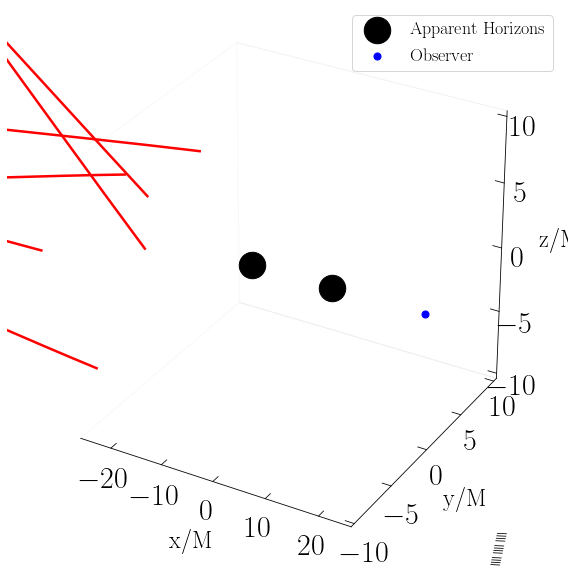

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 115


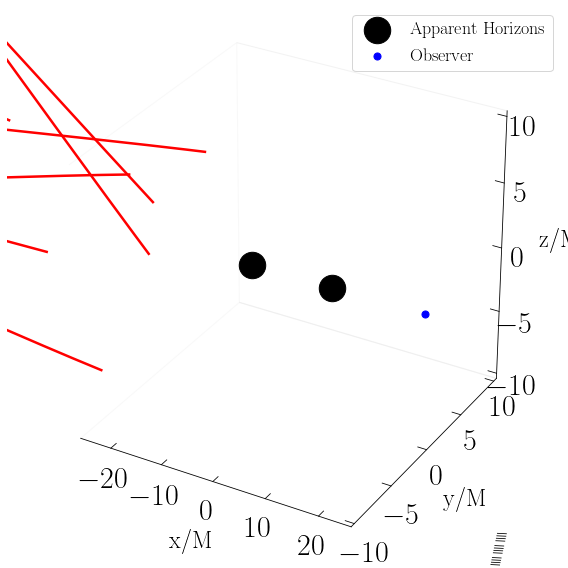

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 116


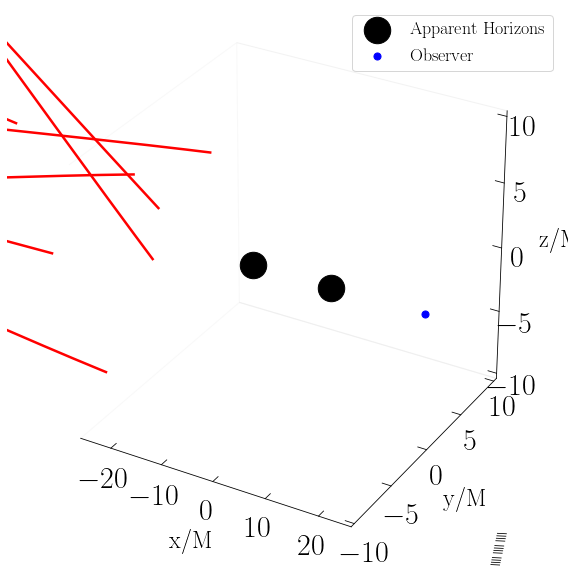

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 117


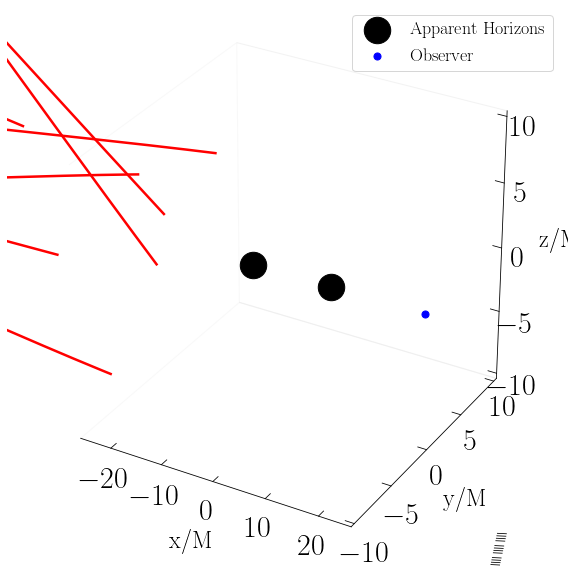

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 118


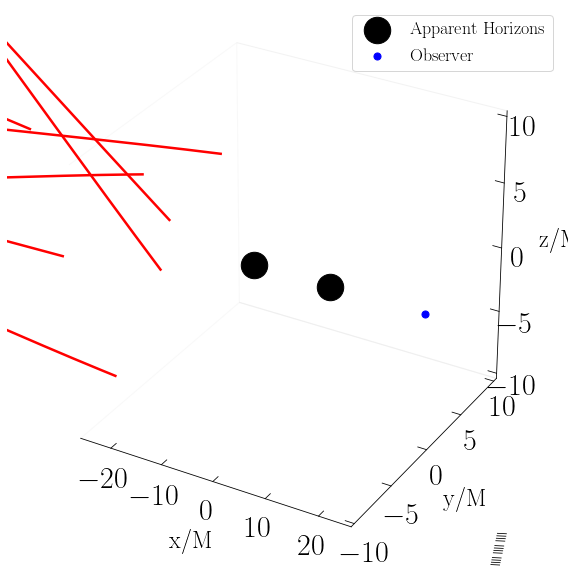

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 119


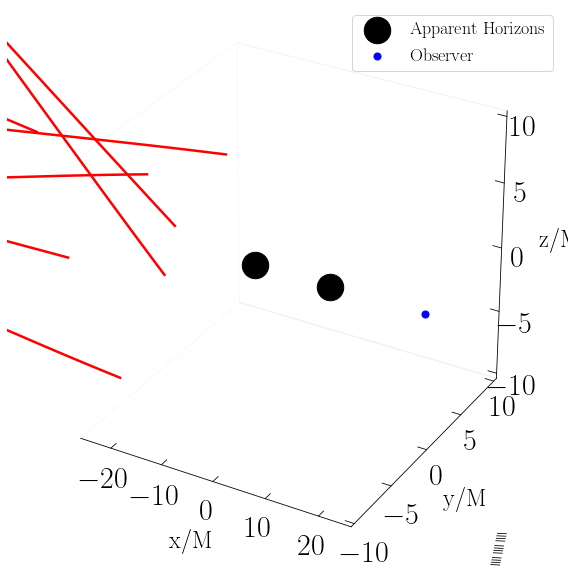

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 120


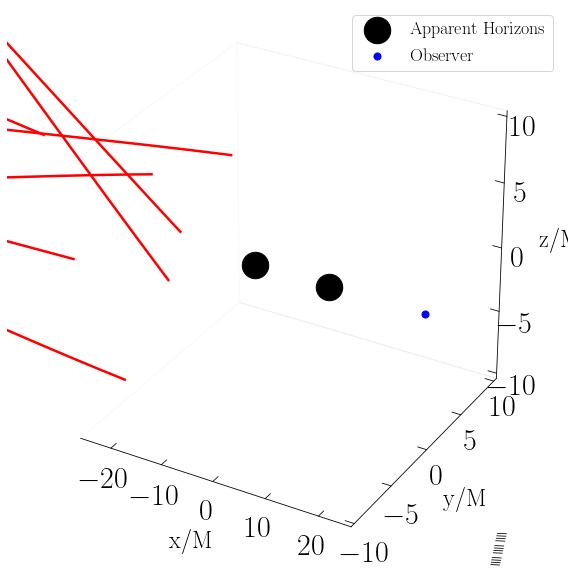

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 121


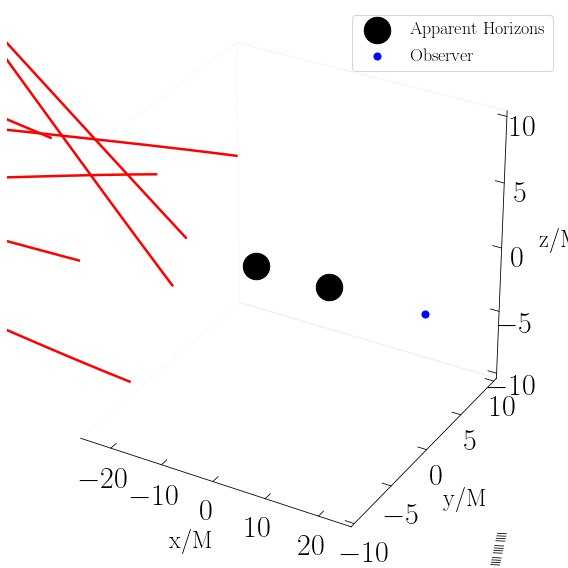

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 122


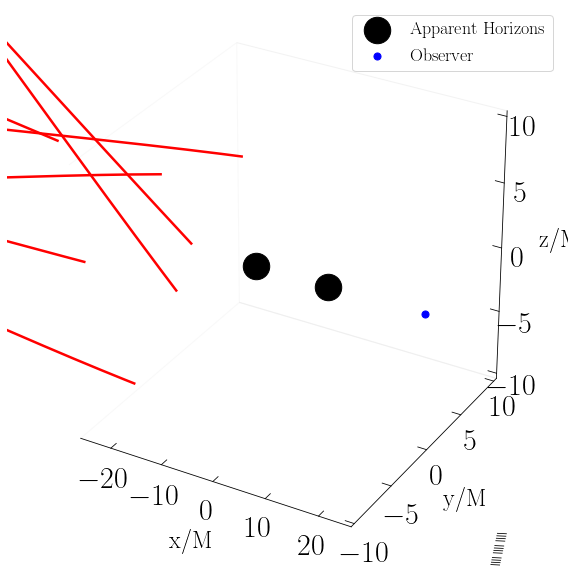

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 123


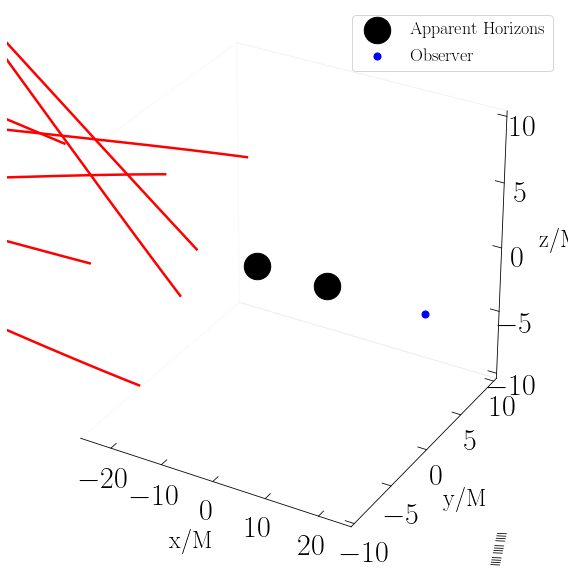

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 124


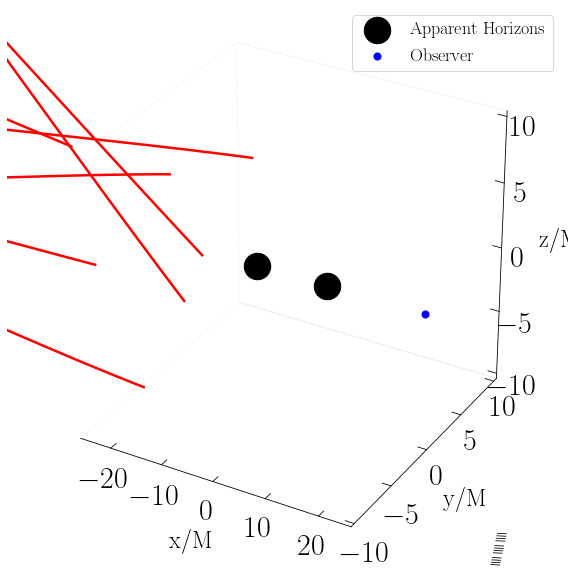

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 125


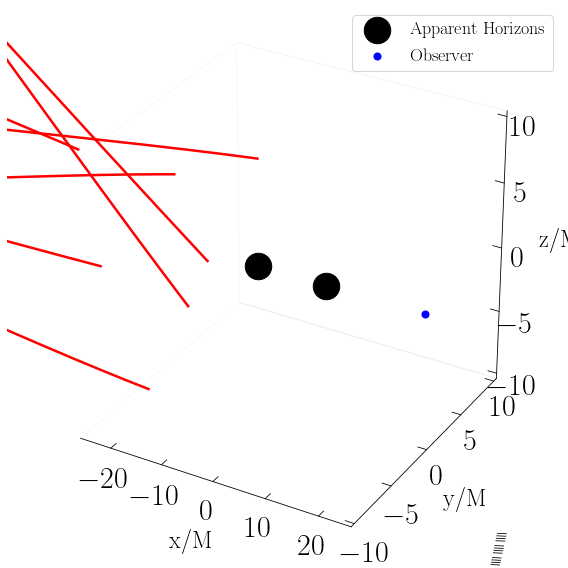

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 126


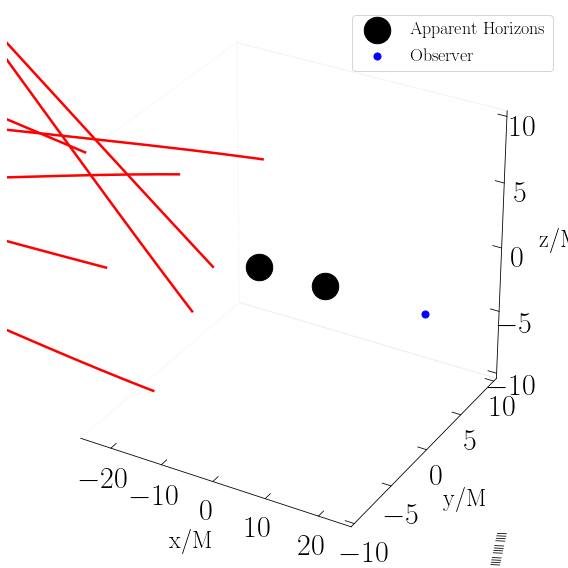

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 127


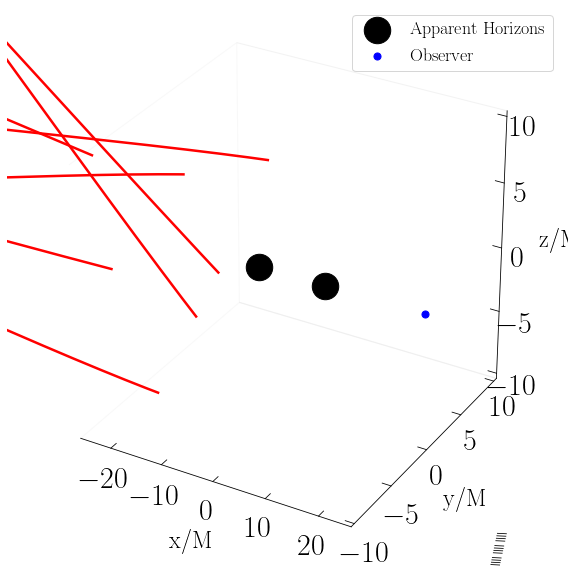

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 128


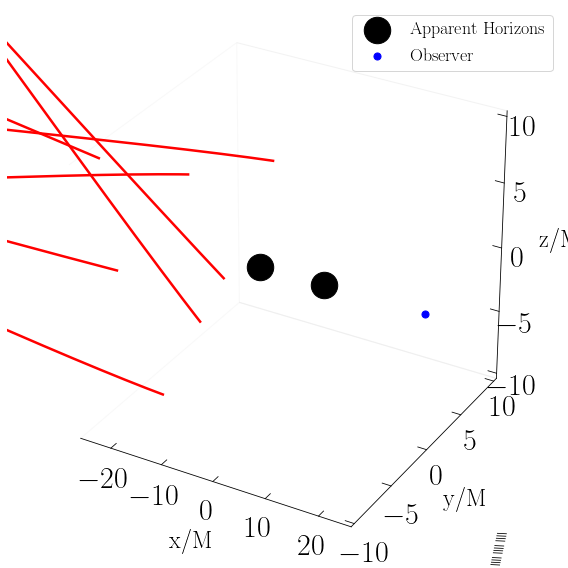

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 129


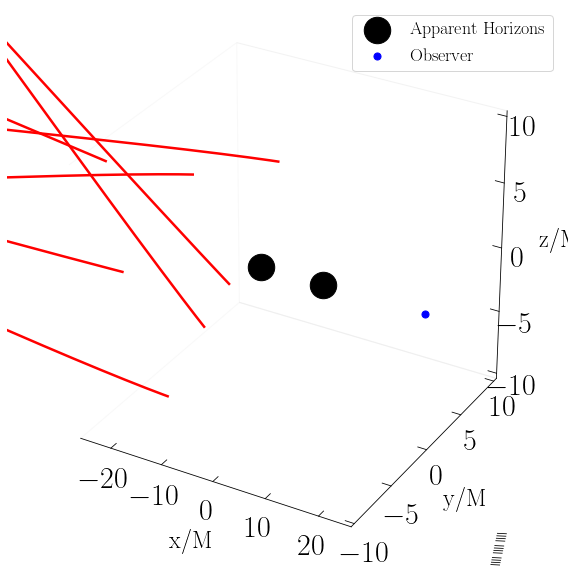

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 130


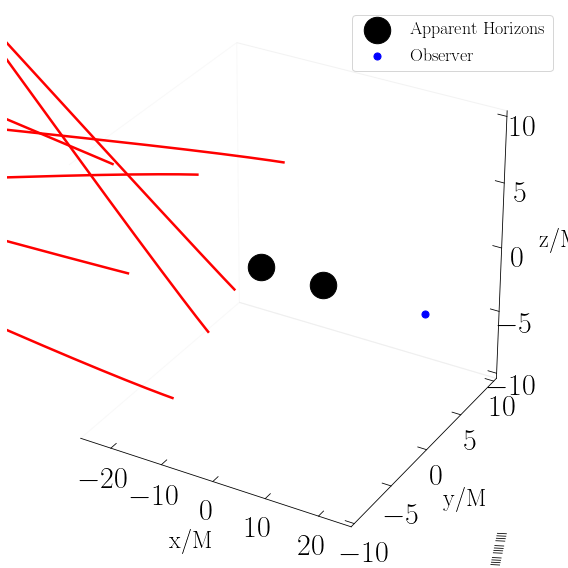

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 131


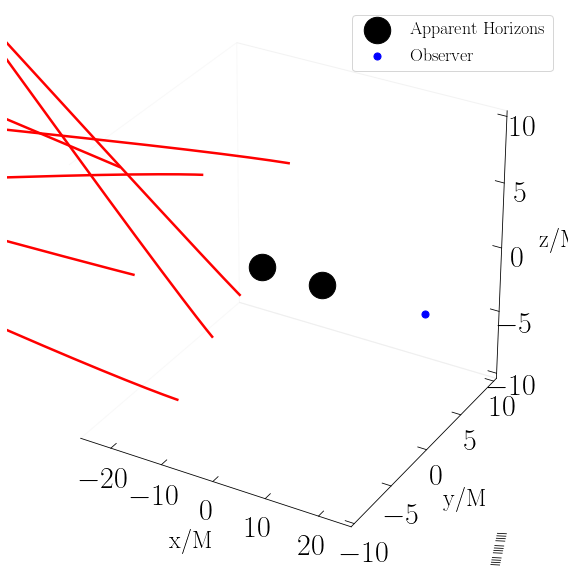

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 132


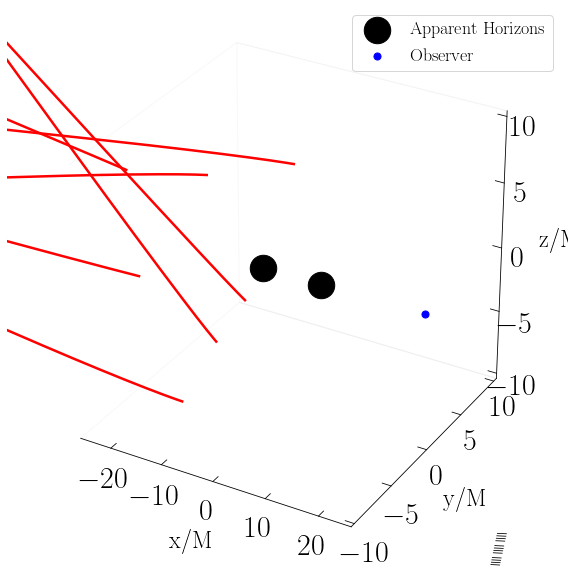

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 133


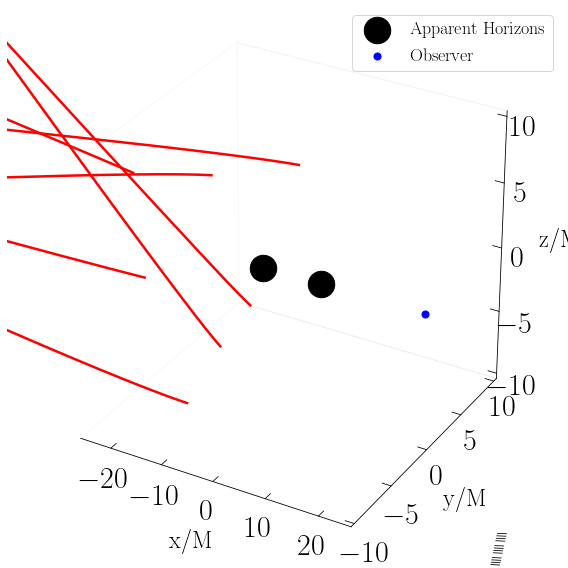

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 134


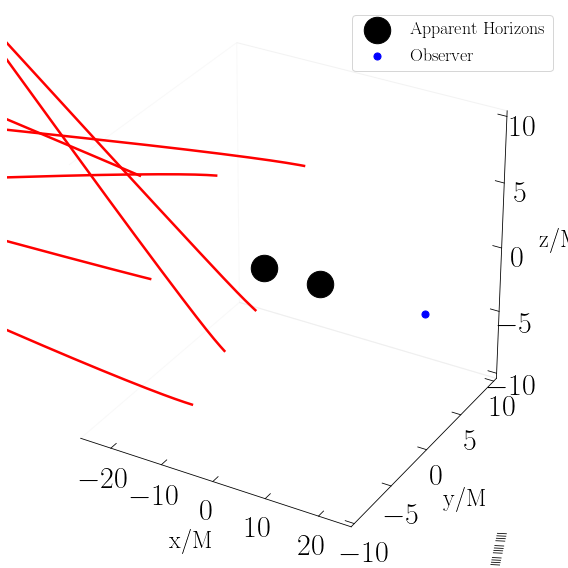

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 135


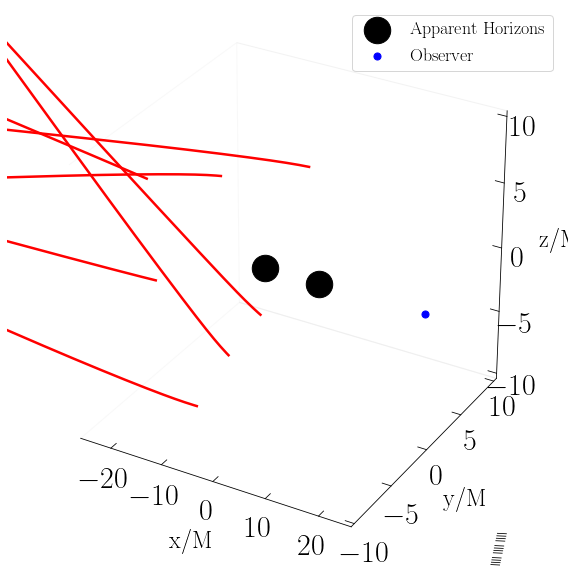

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 136


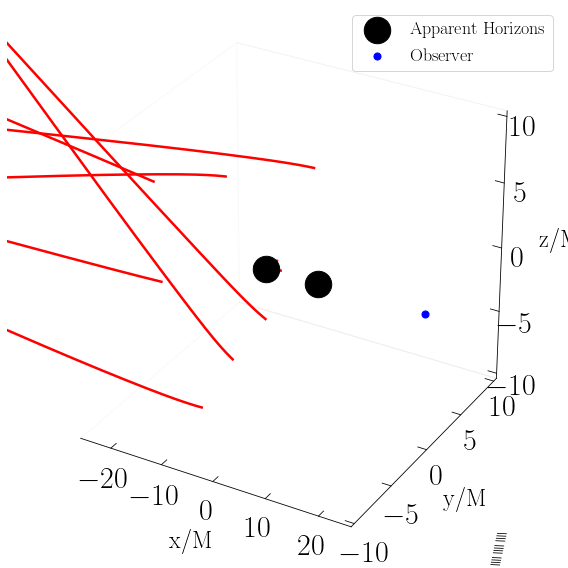

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 137


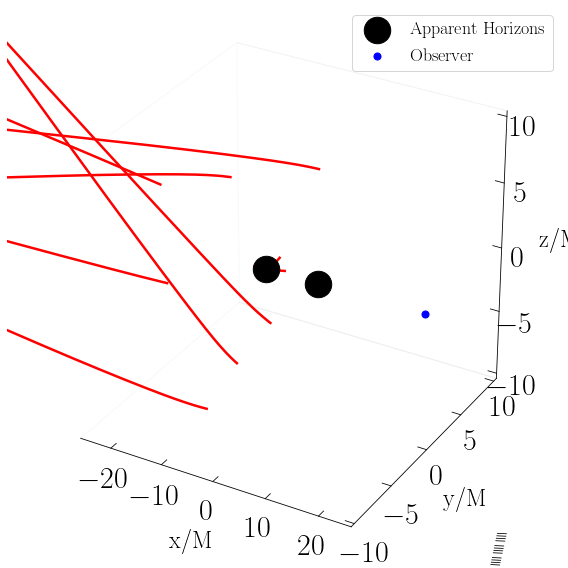

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 138


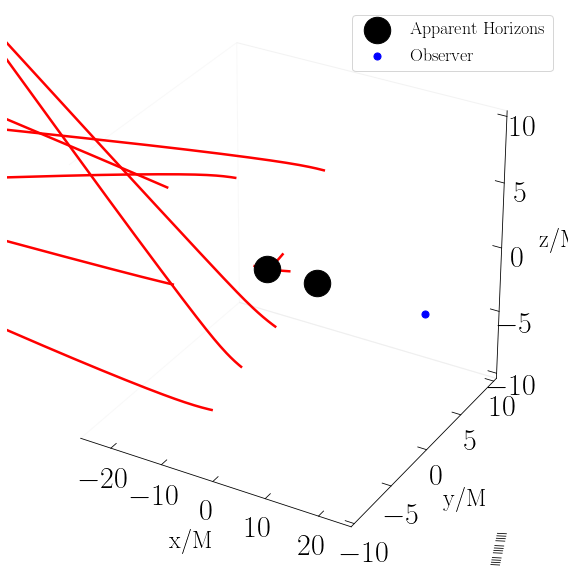

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 139


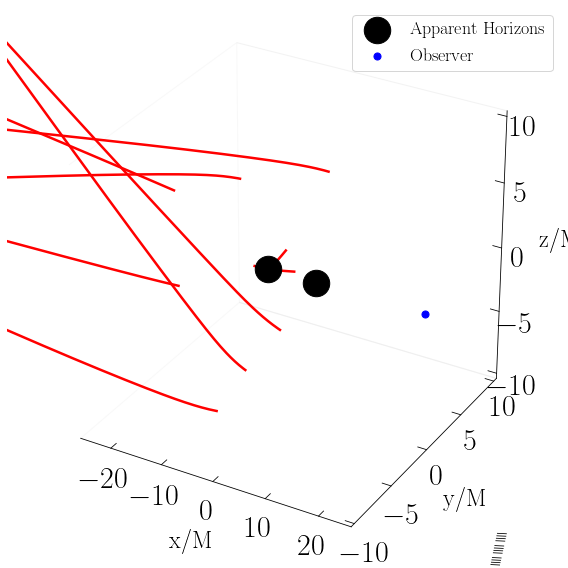

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 140


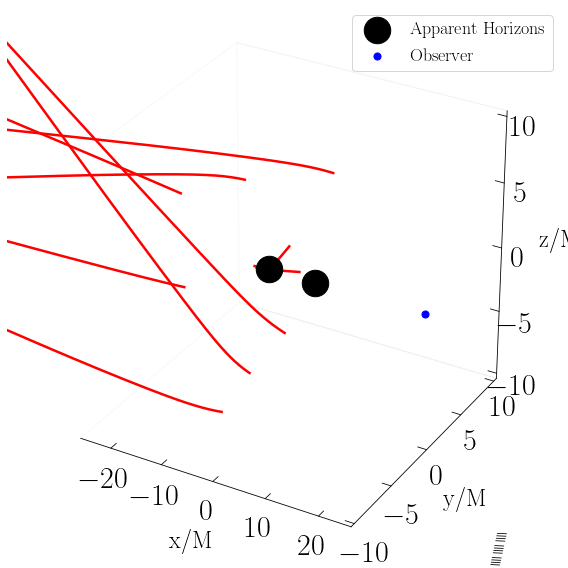

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 141


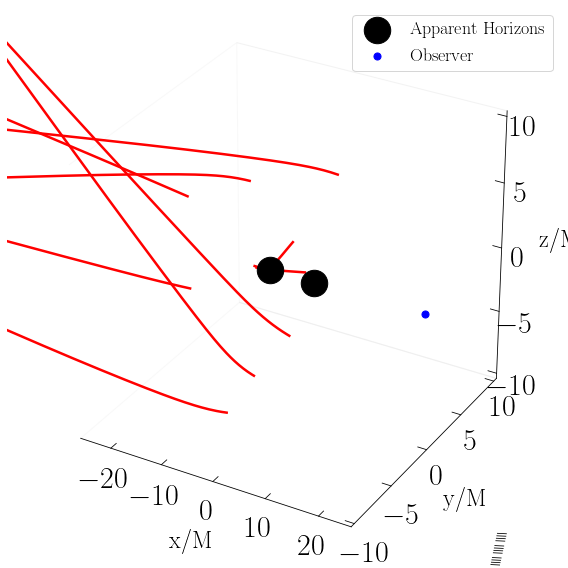

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 142


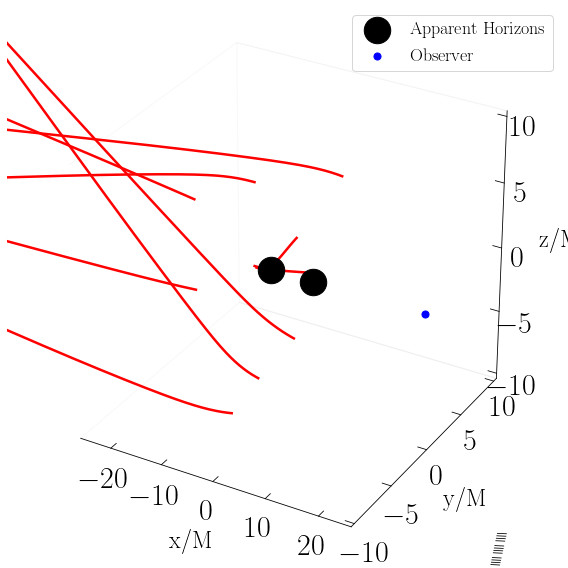

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 143


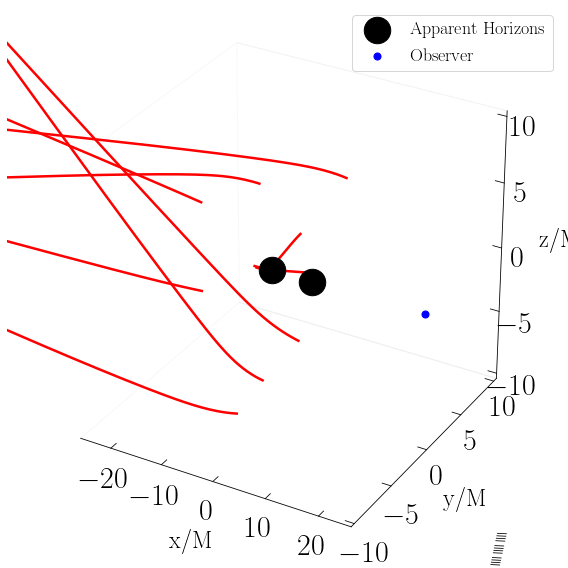

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 144


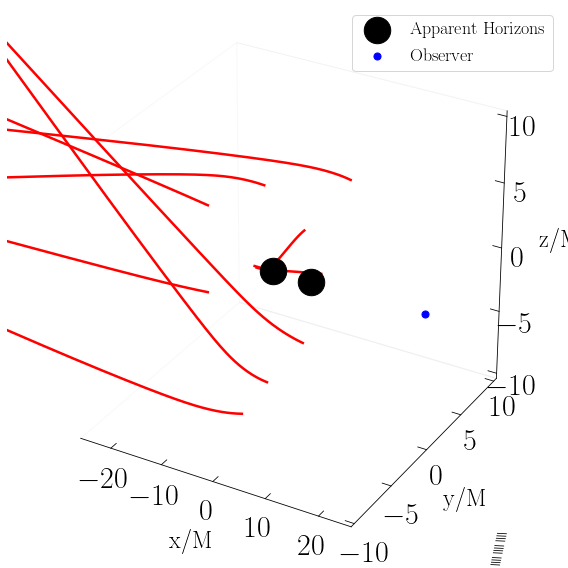

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 145


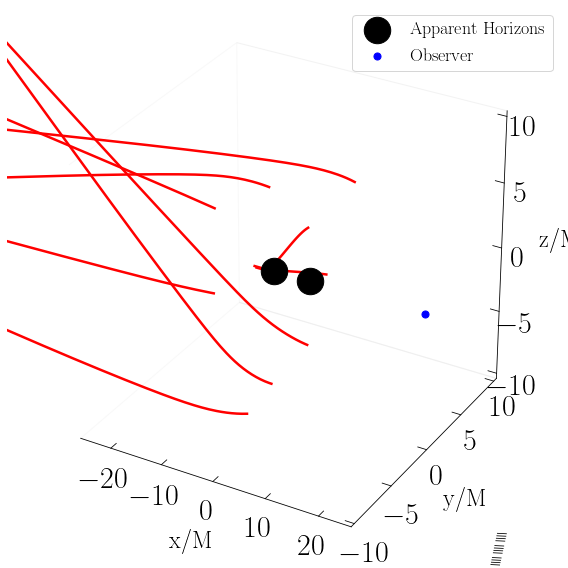

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 146


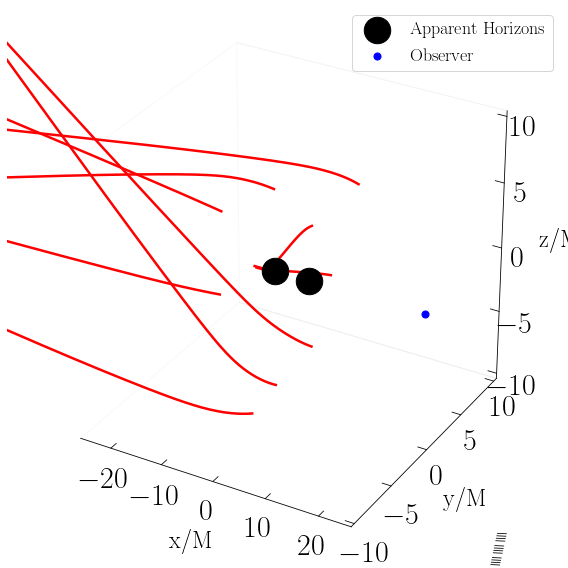

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 147


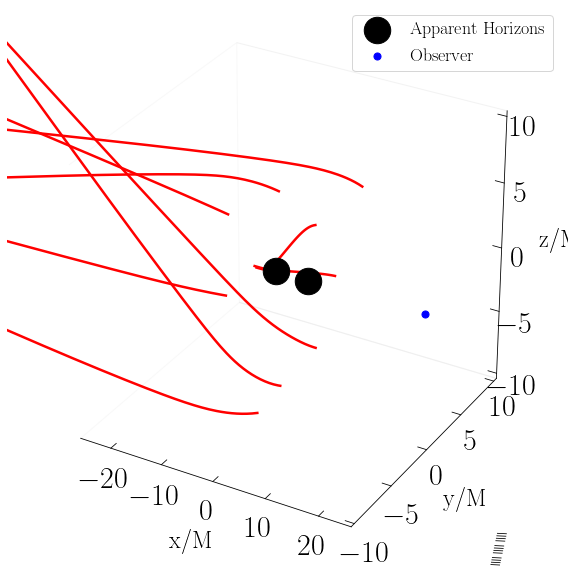

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 148


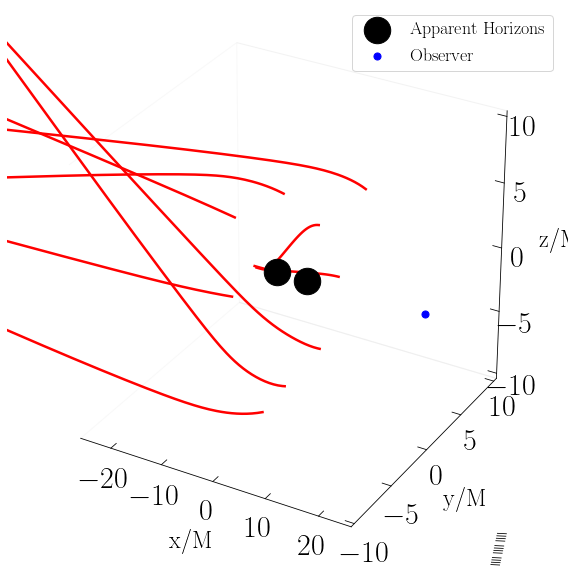

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 149


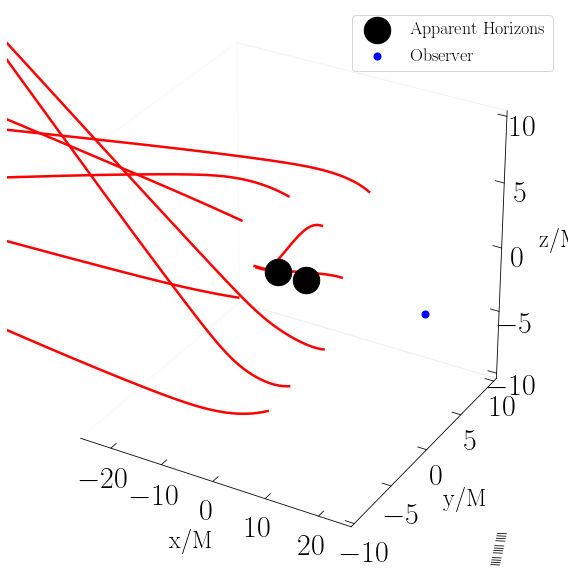

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 150


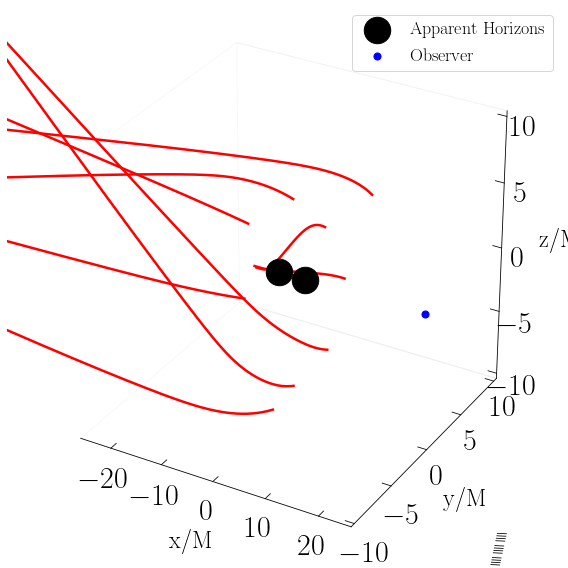

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 151


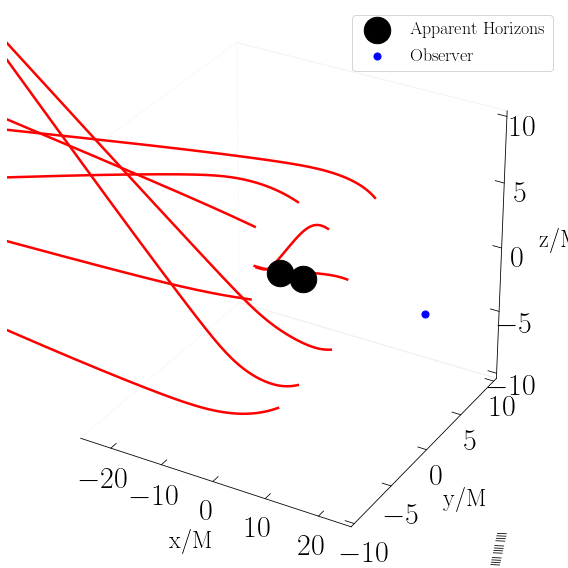

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 152


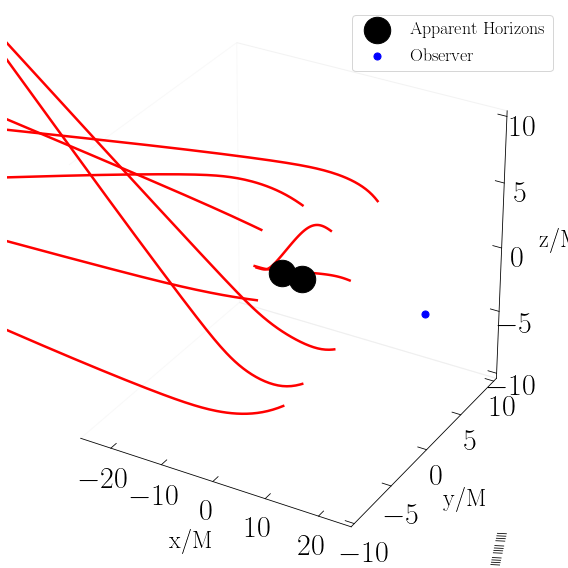

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 153


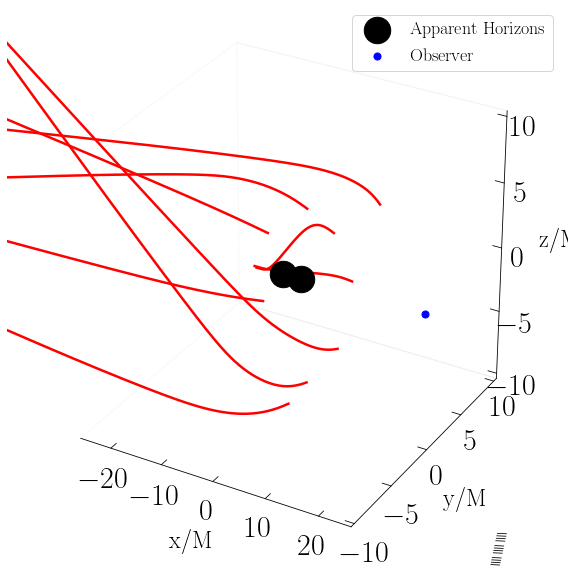

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 154


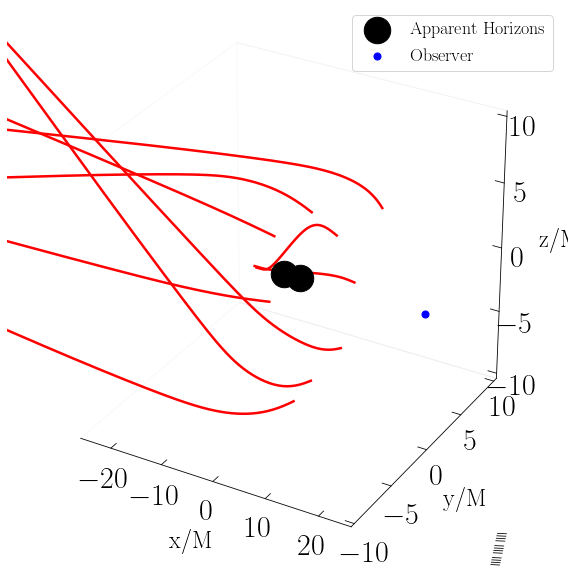

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 155


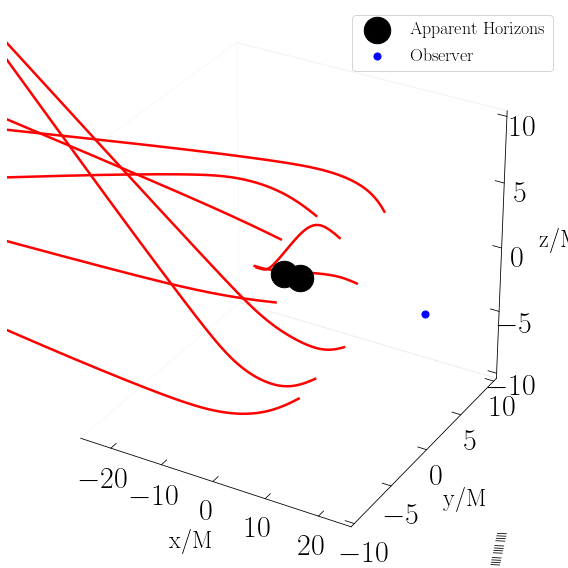

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 156


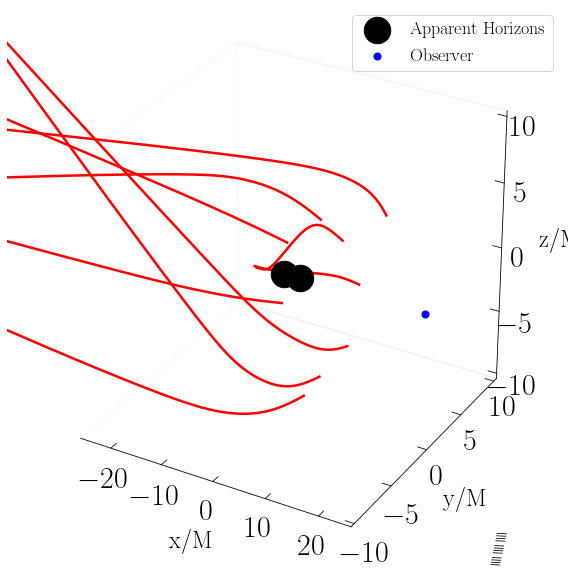

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 157


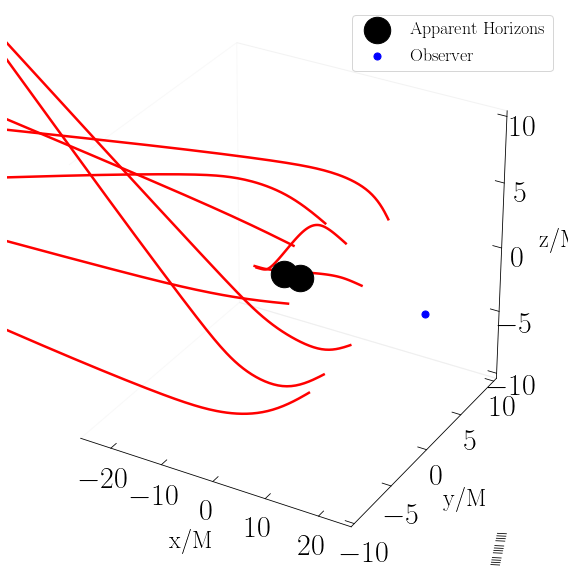

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 158


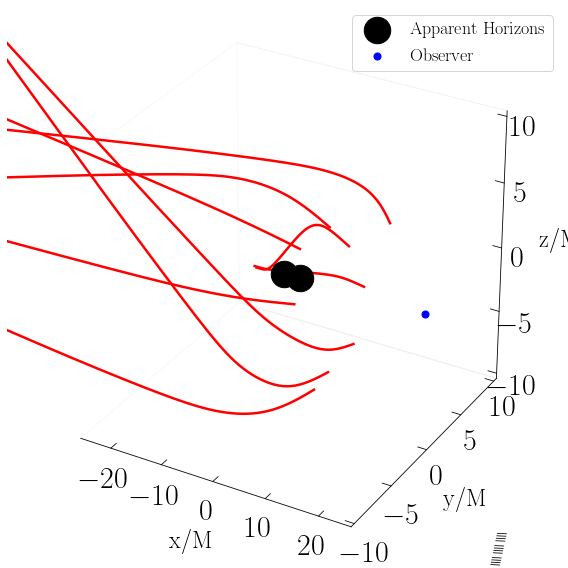

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 159


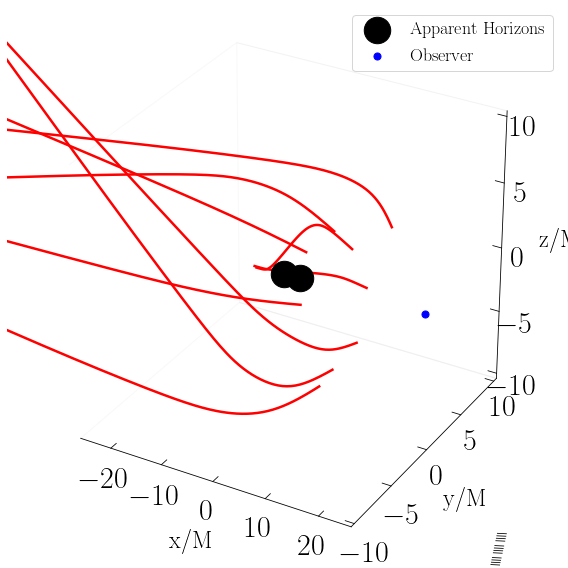

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 160


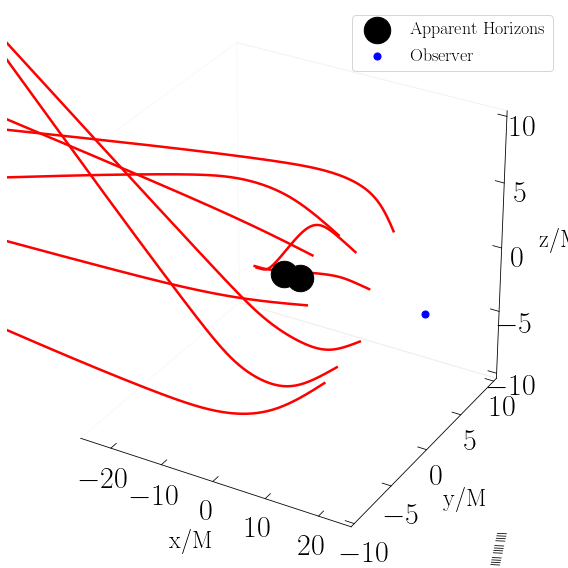

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 161


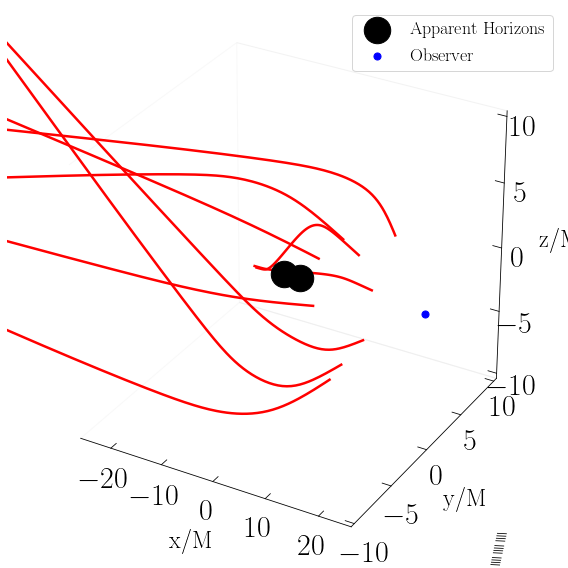

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 162


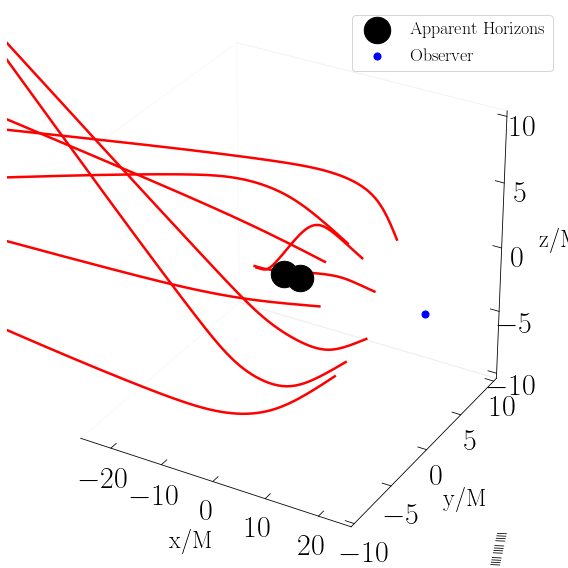

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 163


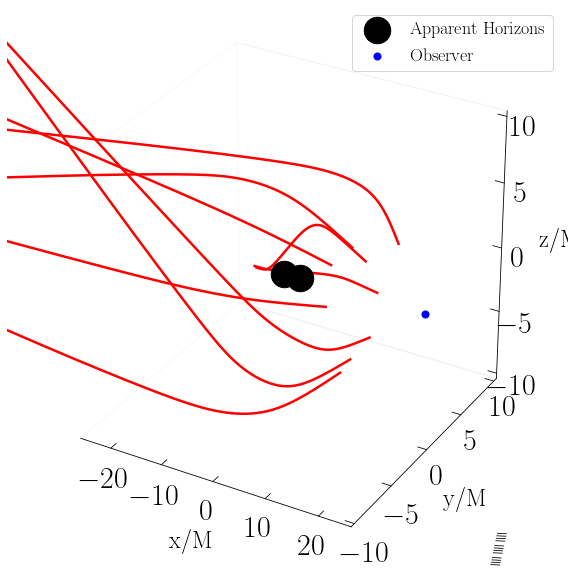

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 164


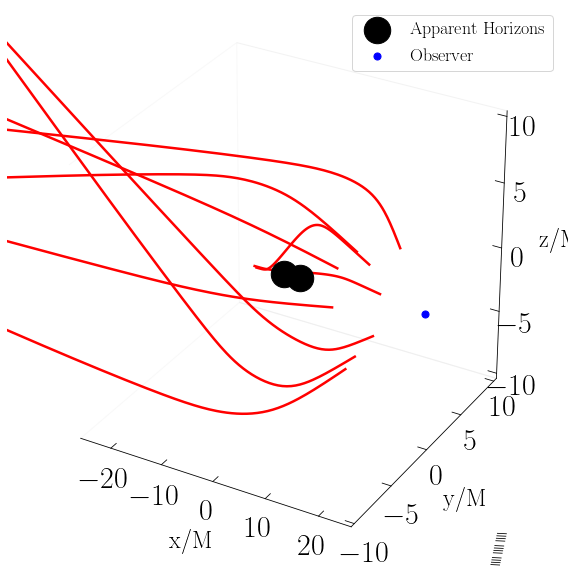

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 165


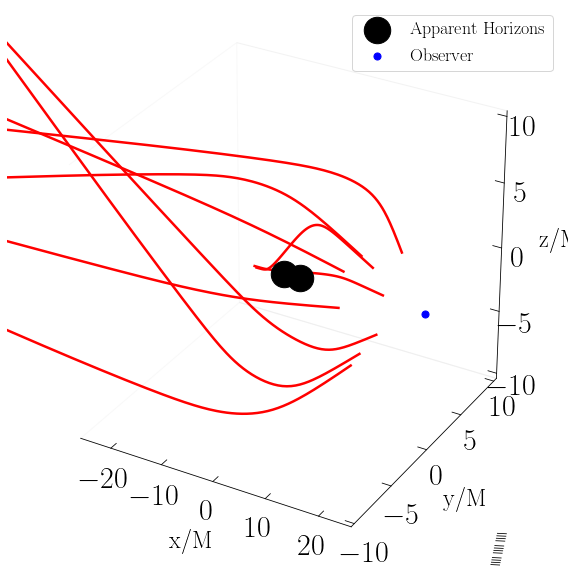

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 166


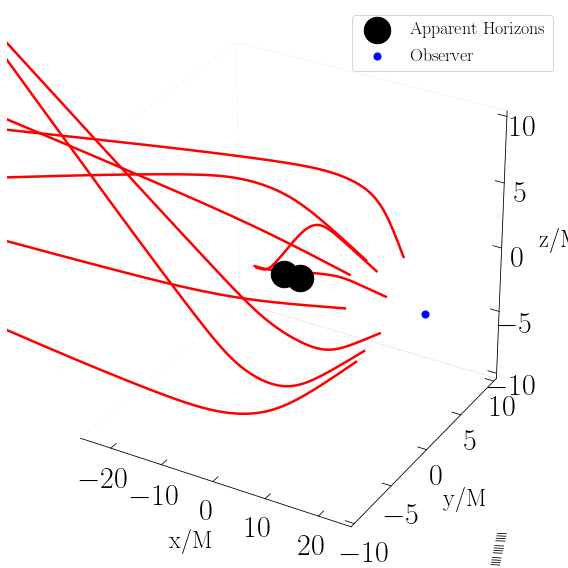

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 167


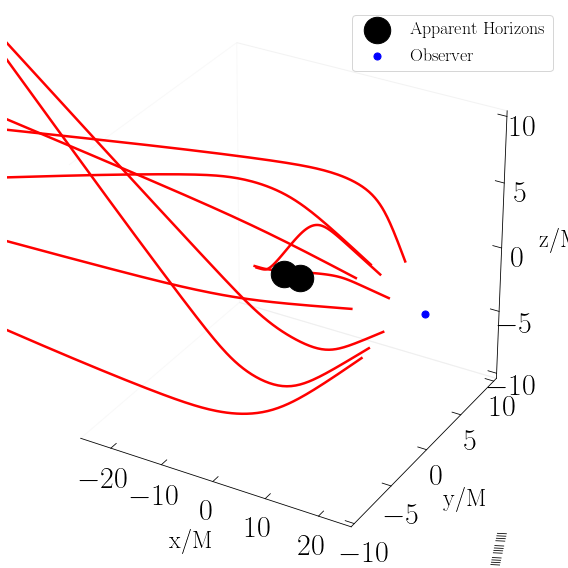

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 168


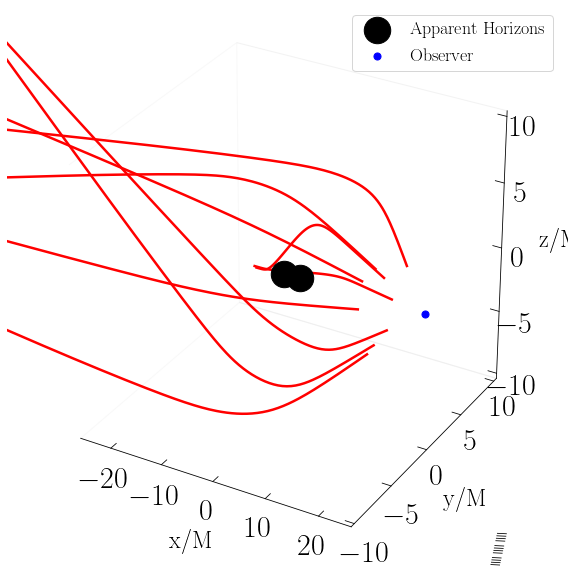

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 169


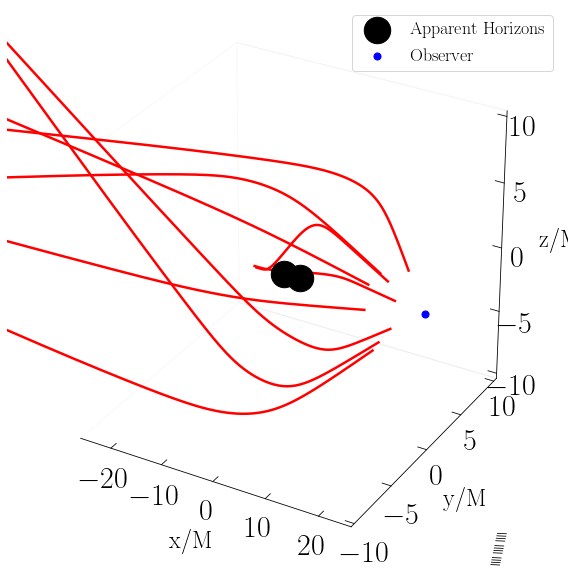

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 170


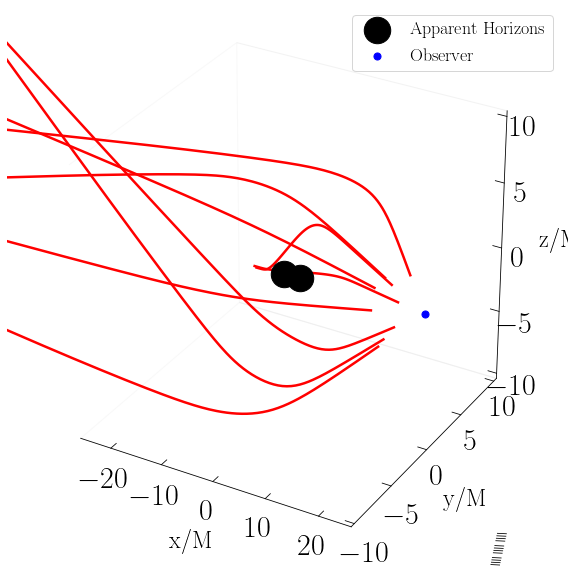

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 171


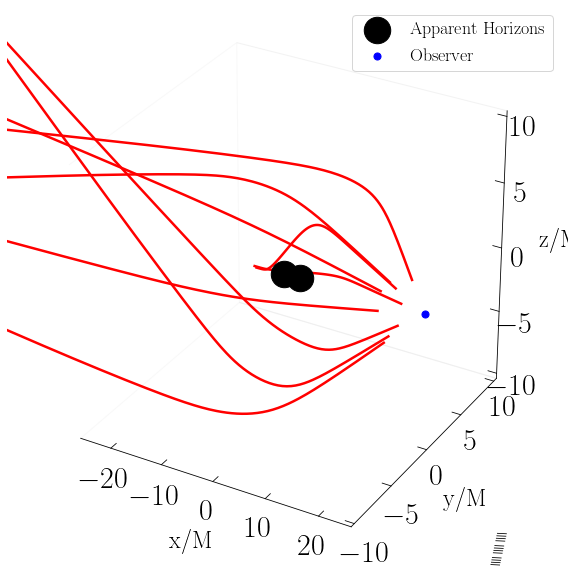

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 172


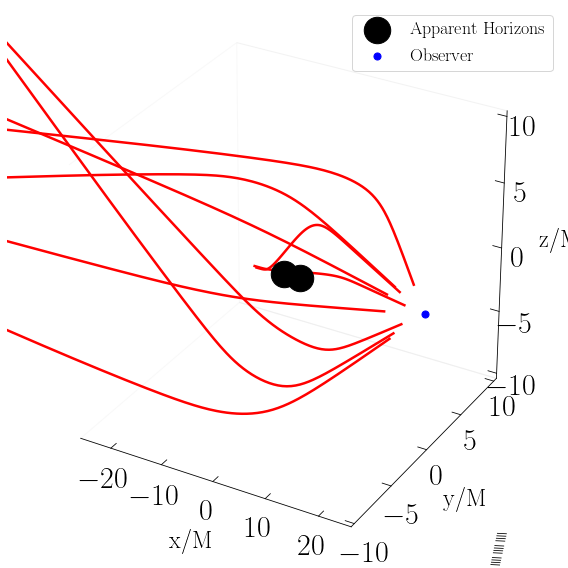

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 173


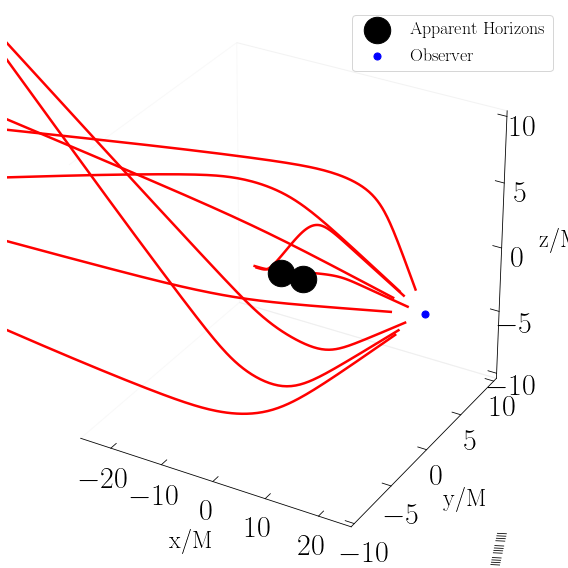

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 174


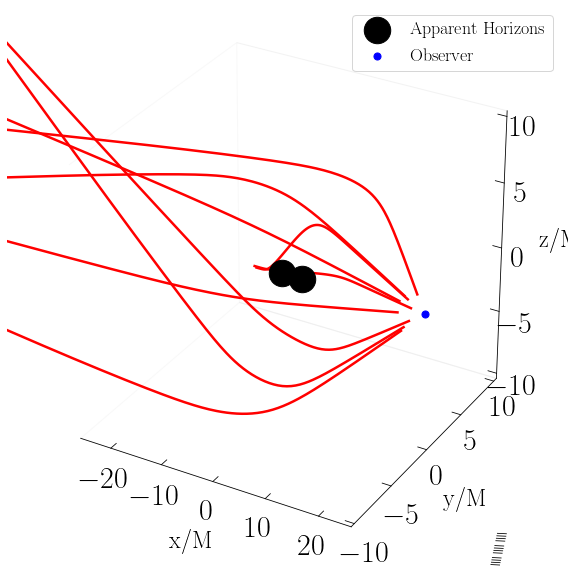

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 175


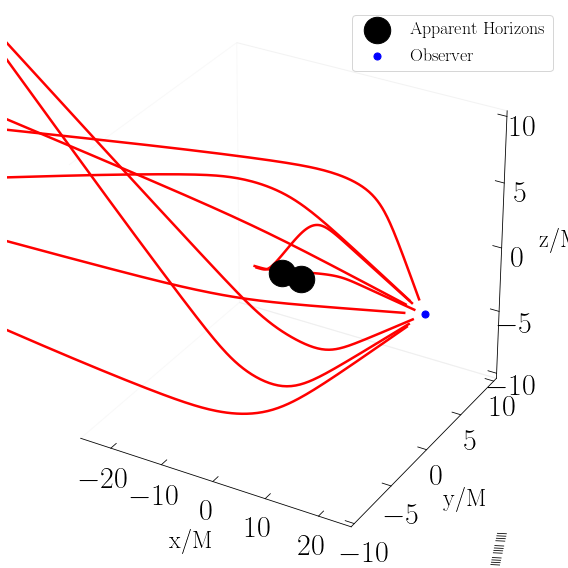

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 176


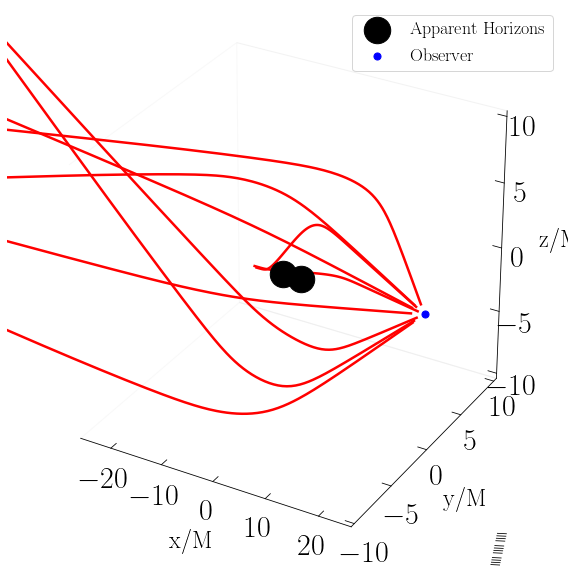

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 177


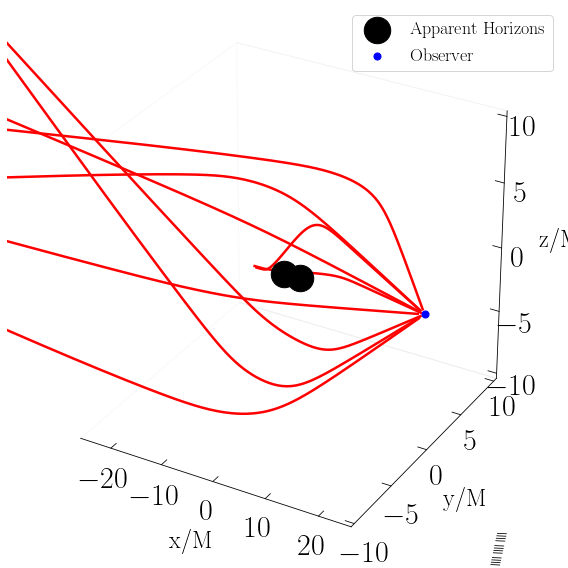

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 178


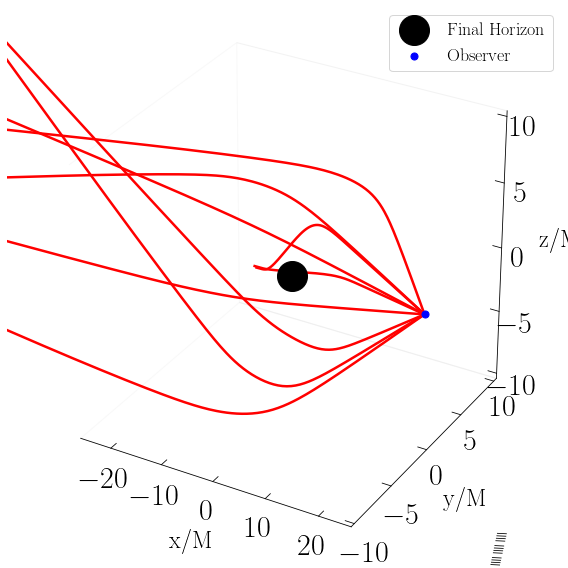

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 179


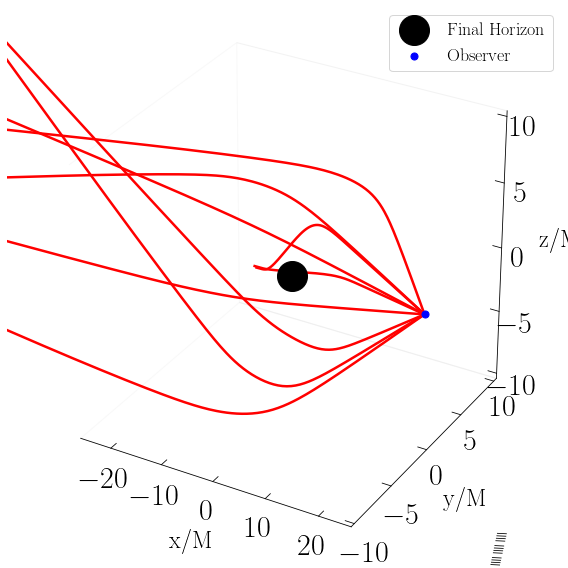

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 180


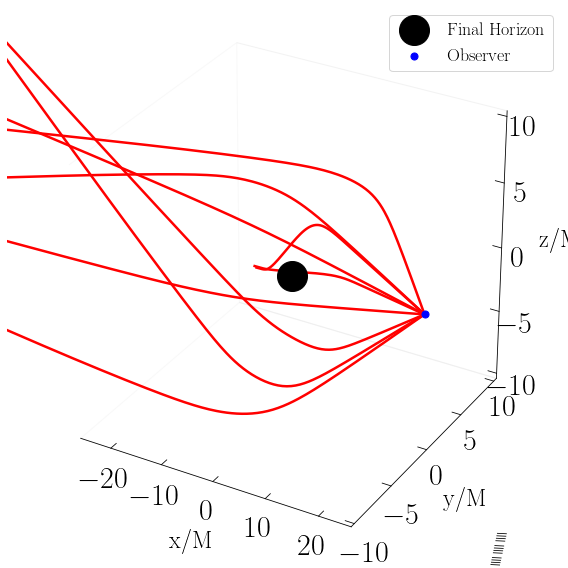

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 181


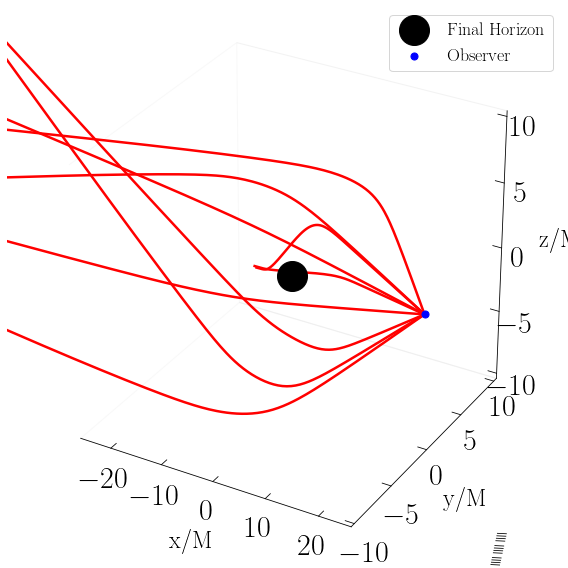

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 182


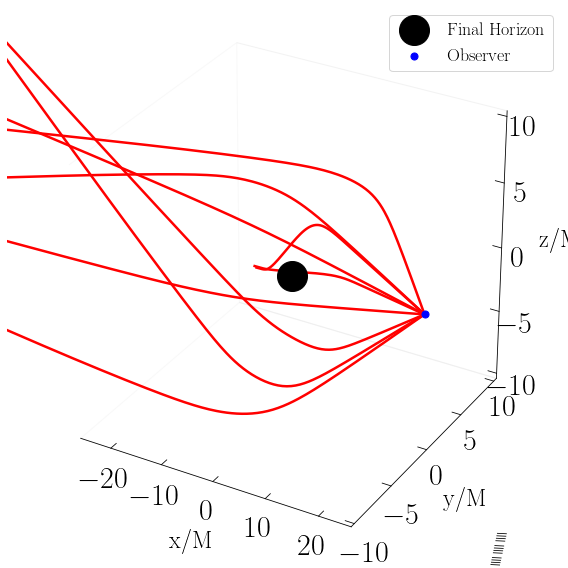

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 183


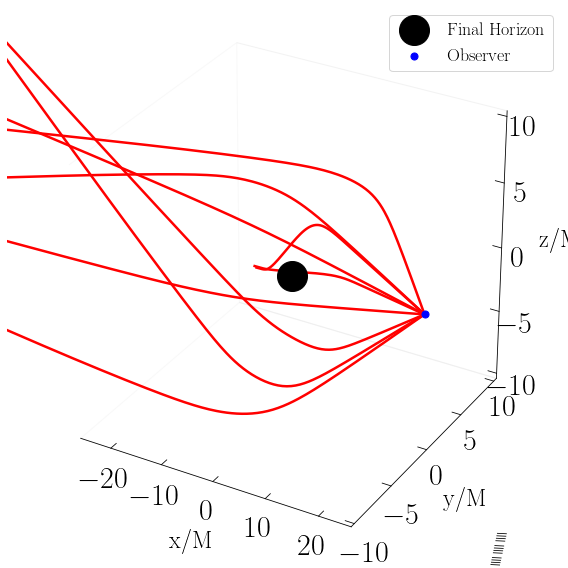

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 184


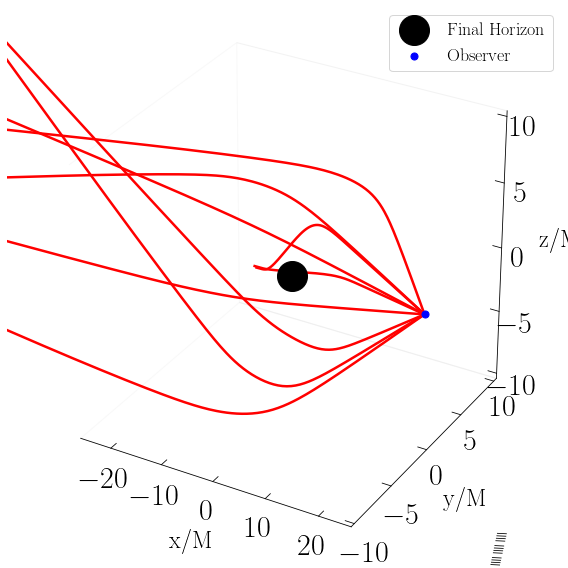

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 185


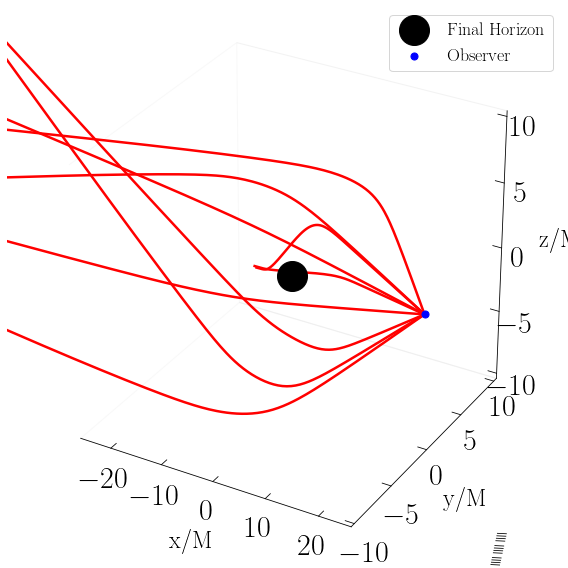

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 186


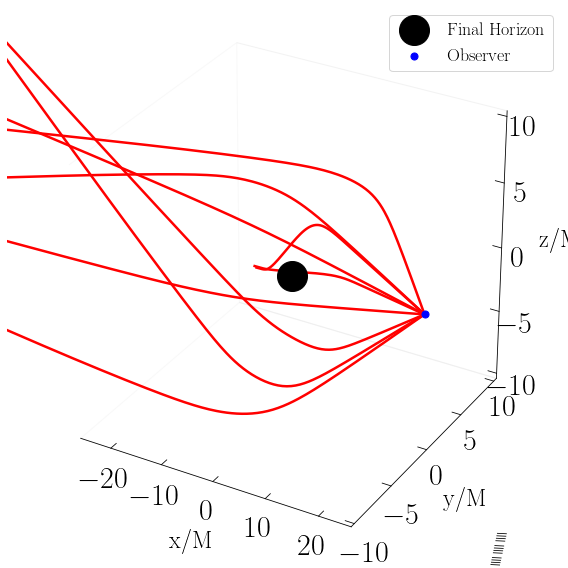

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 187


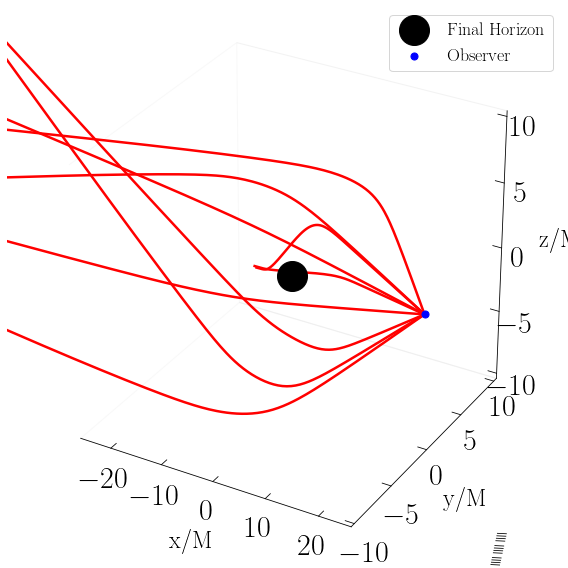

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 188


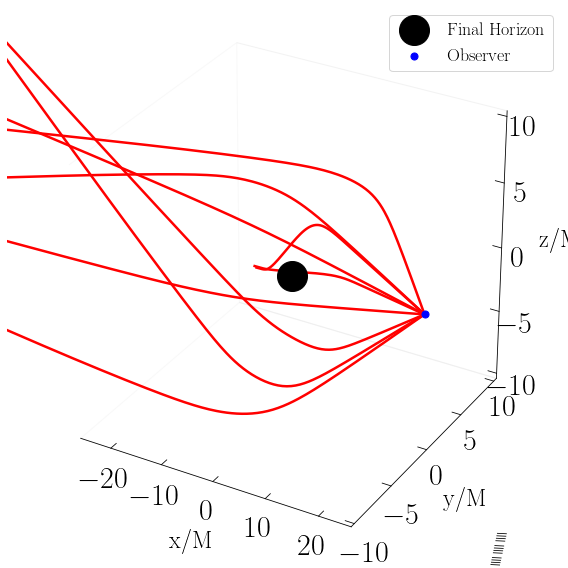

430
[0, 50, 100, 150, 200, 250, 300, 350, 400]
t_geod ranges between: 48M and 178M
t_geod = 189


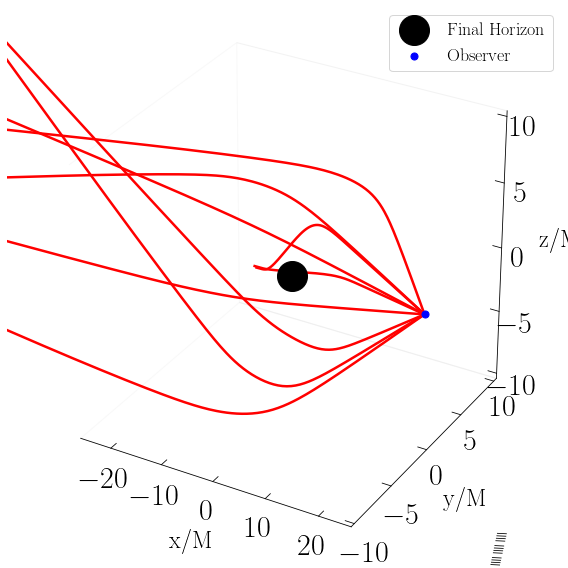

In [437]:
animate_geos(p_merge_edgeon_cam_n25, t_merge, 'PipelineTesting', 'merge', camx=25, xscale=25)

In [ ]:
for t, i in zip(t_kerr, np.arange(len(t_kerr))):
    fig, ax = PlotGetTrajectoriesFromH5_ani(p_kerr_edgeon,t, kerr=True)
    if i < 10: 
        fig.savefig('KerrEdgeOnFinal/frame_000' + str(i) + '.png')
    if i >= 10:
        fig.savefig('KerrEdgeOnFinal/frame_00' + str(i) + '.png')
    if i>=10 and i >=100:
        fig.savefig('KerrEdgeOnFinal/frame_0' + str(i) + '.png')

# Animation Testing 

In [ ]:
fig50, ax50 = PlotGetTrajectoriesFromH5_ani(p_merge, 50, merge=True)

In [ ]:
fig60, ax60 = PlotGetTrajectoriesFromH5_ani(p_merge, 60, merge=True)

In [ ]:
fig70, ax70 = PlotGetTrajectoriesFromH5_ani(p_merge, 70, merge=True)

In [ ]:
fig80, ax80 = PlotGetTrajectoriesFromH5_ani(p_merge, 80, merge=True)

In [ ]:
fig90, ax90 = PlotGetTrajectoriesFromH5_ani(p_merge, 90, merge=True)

In [ ]:
fig100, ax100 = PlotGetTrajectoriesFromH5_ani(p_merge, 100, merge=True)

In [ ]:
fig110, ax110 = PlotGetTrajectoriesFromH5_ani(p_merge, 110, merge=True)

In [ ]:
fig120, ax120 = PlotGetTrajectoriesFromH5_ani(p_merge, 120, merge=True)

In [ ]:
fig130, ax130 = PlotGetTrajectoriesFromH5_ani(p_merge, 130, merge=True)

In [ ]:
fig140, ax140 = PlotGetTrajectoriesFromH5_ani(p_merge, 140, merge=True)

In [ ]:
fig145, ax145 = PlotGetTrajectoriesFromH5_ani(p_merge, 145, merge=True)

In [ ]:
fig146, ax146 = PlotGetTrajectoriesFromH5_ani(p_merge, 146, merge=True)

In [ ]:
fig147, ax147 = PlotGetTrajectoriesFromH5_ani(p_merge, 147, merge=True)

In [ ]:
fig148, ax148 = PlotGetTrajectoriesFromH5_ani(p_merge, 148, merge=True)

In [ ]:
fig149, ax149 = PlotGetTrajectoriesFromH5_ani(p_merge, 149, merge=True)

In [ ]:
fig150, ax150 = PlotGetTrajectoriesFromH5_ani(p_merge, 150, merge=True)

In [ ]:
fig151, ax151 = PlotGetTrajectoriesFromH5_ani(p_merge, 151, merge=True)

In [ ]:
fig152, ax152 = PlotGetTrajectoriesFromH5_ani(p_merge, 152, merge=True)

In [ ]:
fig153, ax153 = PlotGetTrajectoriesFromH5_ani(p_merge, 153, merge=True) # apparent horizons should be merging here 

In [ ]:
fig154, ax154 = PlotGetTrajectoriesFromH5_ani(p_merge, 154, merge=True) # Emergence of AhC

In [ ]:
fig155, ax155 = PlotGetTrajectoriesFromH5_ani(p_merge, 155, merge=True) # Emergence of AhC

In [ ]:
fig156, ax156 = PlotGetTrajectoriesFromH5_ani(p_merge, 156, merge=True) # Ringdown 

In [ ]:
fig157, ax157 = PlotGetTrajectoriesFromH5_ani(p_merge, 157, merge=True) 

In [ ]:
fig158, ax158 = PlotGetTrajectoriesFromH5_ani(p_merge, 158, merge=True) # Emergence of AhC

In [ ]:
fig159, ax159 = PlotGetTrajectoriesFromH5_ani(p_merge, 159, merge=True) # Emergence of AhC

In [ ]:
fig160, ax160 = PlotGetTrajectoriesFromH5_ani(p_merge, 160, merge=True) 

In [ ]:
fig161, ax161 = PlotGetTrajectoriesFromH5_ani(p_merge, 161, merge=True) 

In [ ]:
fig162, ax162 = PlotGetTrajectoriesFromH5_ani(p_merge, 162, merge=True) 

In [ ]:
fig163, ax163 = PlotGetTrajectoriesFromH5_ani(p_merge, 163, merge=True) 

In [ ]:
fig164, ax164 = PlotGetTrajectoriesFromH5_ani(p_merge, 164, merge=True) 

In [ ]:
fig165, ax165 = PlotGetTrajectoriesFromH5_ani(p_merge, 165, merge=True) 

In [ ]:
fig170, ax170 = PlotGetTrajectoriesFromH5_ani(p_merge, 170, merge=True) 

In [ ]:
fig180, ax180 = PlotGetTrajectoriesFromH5_ani(p_merge, 180, merge=True) 

In [ ]:
fig190, ax190 = PlotGetTrajectoriesFromH5_ani(p_merge, 190, merge=True) 

In [ ]:
fig200, ax200 = PlotGetTrajectoriesFromH5_ani(p_merge, 200, merge=True) 

In [ ]:
binary_figs = [fig45, fig50, fig60, fig70, fig80, fig90, fig100, fig110, fig120, fig130,
              fig140, fig145, fig146, fig147, fig148, fig149, fig150, fig151, fig152, fig153,
              fig154, fig155, fig156, fig157, fig158, fig159, fig160, fig161, fig162, fig163,
              fig164, fig165, fig170, fig180, fig190, fig200]

binary_figs_tst = [fig150, fig151, fig152, fig153]

In [ ]:

for i in np.arange(len(binary_figs)):
    if i < 10: 
        binary_figs[i].savefig('MergerFigs4/frame_000' + str(i) + '.png')
    if i >= 10:
        binary_figs[i].savefig('MergerFigs4/frame_00' + str(i) + '.png')

# Extra Stuff

In [ ]:
## Plot geodesic trajectories
def PlotGetTrajectoriesFromH5_ani(p, t_geo, kerr=False, merge=False, testing=False):
    
    '''
    Args: 
        - p: file path
        - t_geo (int): sets animation time interval [t:t_geo]
    return: 
        - fig: figure window(s)
        - ax: axis params 
    '''

    Indices = GetGeodesicIndices(p, infinity=False)
    print(len(Indices))
    
    # chose the number of geodesics you want to plot
    Indices = Indices[::50]  
    print(Indices)
    cs = sns.color_palette('Paired', n_colors=len(Indices))
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Chose the duration of the Geodesic to plot
    t, x, y, z = GetGeodesicTrajectory(p, 0)
    print('t_geod ranges between: ' + str(int(np.round(t[0])))+ 'M and ' + str(int(np.round(t[len(t)-1]))) +'M')
    #t_geo = input('t_geod:')
    print('t_geod = ' + str(t_geo))
    
    # Set up figure labels
    ax.set_xlabel('x/M',labelpad=20)
    ax.set_ylabel('y/M', labelpad=20)
    ax.set_zlabel('z/M', labelpad=20)
    lim = 20.0
    
    
        
    # Plot Kerr BH Grid
    if kerr == True: 
                # draw sphere
        R = 2. # R_s
        #R=1. # R_s
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j] # change xj to improve resolution 
        x = R*np.cos(u)*np.sin(v)
        y = R*np.sin(u)*np.sin(v)
        z = R*np.cos(v)
        ax.plot_wireframe(x, y, z, color="k", alpha = 0.3, linewidth = .5, label = 'Event Horizon')
        
        #u = np.linspace(0, 2 * np.pi, 100)
        #v = np.linspace(0, np.pi, 100)
        #x = R*np.outer(np.cos(u), np.sin(v))
        #y = R*np.outer(np.sin(u), np.sin(v))
        #z = R*np.outer(np.ones(np.size(u)), np.cos(v))
        #ax.plot_surface(x, y, z, linewidth=0.0, cmap = 'Greys')
        
        for n, color in zip(Indices, cs):
            t, x, y, z = GetGeodesicTrajectory(p, n)
            inds_animate = np.where(np.array(t) <= int(t_geo)*1.)[0]
            ax.plot(x[inds_animate], y[inds_animate], z[inds_animate], '-', lw = 3.0, color = color)
  


    # Plot Mergeing Aparent Horizons
    if merge == True:
        # Load Binary BH Data
        ta, xa, ya, za = np.loadtxt('/mnt/ceph/users/ledmond/HeadOnLensing/Trajectory_AhA.dat', comments="#",usecols=([0,1,2,3]),unpack=True) # AhA
        tb, xb, yb, zb = np.loadtxt('/mnt/ceph/users/ledmond/HeadOnLensing/Trajectory_AhB.dat', comments="#",usecols=([0,1,2,3]),unpack=True) # AhB
        tc, xc, yc, zc = np.loadtxt('/mnt/ceph/users/ledmond/HeadOnLensing/Trajectory_AhC.dat', comments="#",usecols=([0,1,2,3]),unpack=True) # AhC
        t_animate = t_geo
        inda = np.where(ta <= int(t_animate)*1.)[0]
        indb = np.where(tb <= int(t_animate)*1.)[0]
        indc = np.where(tc <= int(t_animate)*1.)[0]
        # to make sure the plot is centered around AhZ correctly
        ax.scatter(xc, yc, zc, s = 0.0001, color = 'k', alpha = 0.01)
        
        # Actually plot the Geodesics
        for n, color in zip(Indices, cs):
            t, x, y, z = GetGeodesicTrajectory(p, n)
            inds_animate = np.where(np.array(t) <= int(t_geo)*1.)[0]
            #ax.plot(x[inds_animate], y[inds_animate], z[inds_animate], '-', lw = 3.0, color = color)
            ax.plot(x[inds_animate], y[inds_animate], z[inds_animate], '-', lw = 3.0, color = color)
            ax.plot(x, y, z, '-', lw = 0.0, color = 'white')
        
        if np.round(int(t_geo)) == np.round(min(tc)-4):
            ax.scatter([1.5], [0.5], [0.5], s = 700, color = 'k', label = 'AhA')
            ax.scatter([-1.5], [0.5], [0.5], s = 700, color = 'k', label = 'AhB')             
        elif np.round(int(t_geo)) == np.round(min(tc)-3):
            ax.scatter([1.0], [0.5], [0.5], s = 700, color = 'k', label = 'AhA')
            ax.scatter([-1.0], [0.5], [0.5], s = 700, color = 'k', label = 'AhB')             
        elif np.round(int(t_geo)) == np.round(min(tc)-2):
            ax.scatter([0.8], [0.5], [0.5], s = 700, color = 'k', label = 'AhA')
            ax.scatter([-0.8], [0.5], [0.5], s = 700, color = 'k', label = 'AhB')             
        elif np.round(int(t_geo)) == np.round(min(tc)-1):
            ax.scatter([0.5], [0.5], [0.5], s = 700, color = 'k', label = 'AhA')
            ax.scatter([-0.5], [0.5], [0.5], s = 700, color = 'k', label = 'AhB') 
        elif np.round(int(t_geo)) >= np.round(min(tc)):
            ax.scatter(xc[:10], yc[:10], zc[:10], s = 900, color = 'k', label = 'AhC (Ani Test)')
        else:
            # To plot AhA and AhB as points
            ax.scatter(xa[inda[len(inda)-1:]], ya[inda[len(inda)-1:]], za[inda[len(inda)-1:]], s = 700, label = 'AhA (Ani Test)', color = 'k', alpha=1)
            ax.scatter(xb[indb[len(indb)-1:]], yb[indb[len(indb)-1:]], zb[indb[len(indb)-1:]] , s = 700, label = 'AhB (Ani Test)', color = 'k', alpha=1)
        
        # To plot AhA and AhB as cylinders 
        #ax.scatter(xa[inda], ya[inda], za[inda], s = 200, label = 'AhA (Ani Test)', color = 'grey', alpha=1)
        #ax.scatter(xb[indb], yb[indb], zb[indb], s = 200, label = 'AhB (Ani Test)', color = 'grey', alpha=1)
    
        
    # Plot Camera
    ax.scatter([0], [0], [10], s = 50, color = 'blue', label = 'Observer')
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis._axinfo['tick']['inward_factor'] = 0
    ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.yaxis._axinfo['tick']['inward_factor'] = 0
    ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.zaxis._axinfo['tick']['inward_factor'] = 0
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
    #ax.set_axis_off()
    
    #ax.set_xlim(-20,10)
    #ax.set_ylim(0,30)
    #ax.set_zlim(0,100)
    
    #plt.legend()
    #plt.grid()
    plt.tight_layout()
    plt.show()
    
    if testing == True:
        return fig, ax, inda, xa, ta, tc
    
    return fig, ax# Extra Stuff

In [ ]:
## Plot geodesic trajectories
def PlotGetTrajectoriesFromH5_ani(p):
    
    '''
    Args: 
        - p: file path
        - t_geo (int): sets animation time interval [t:t_geo]
    return: 
        - fig: figure window(s)
        - ax: axis params 
    '''

    Indices = GetGeodesicIndices(p, infinity=False)
    print(len(Indices))
    
    Indices = Indices[::50]  # chose the number of geodesics you want to plot
    print(Indices)
    
    cs = sns.color_palette('Paired', n_colors=len(Indices))
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    
    t, x, y, z = GetGeodesicTrajectory(p, 0)
    print('t_geod ranges between: ' + str(int(np.round(t[0])))+ 'M and ' + 
              str(int(np.round(t[len(t)-1]))) +'M')
    t_geo = input('t_geod: ')
                
    ax.set_xlabel('x/M',labelpad=20)
    ax.set_ylabel('y/M', labelpad=20)
    ax.set_zlabel('z/M', labelpad=20)
    lim = 20.0

    # Plot Binary BH
    ta, xa, ya, za = np.loadtxt('/mnt/ceph/users/ledmond/HeadOnLensing/Trajectory_AhA.dat', comments="#",usecols=([0,1,2,3]),unpack=True) # AhA
    tb, xb, yb, zb = np.loadtxt('/mnt/ceph/users/ledmond/HeadOnLensing/Trajectory_AhB.dat', comments="#",usecols=([0,1,2,3]),unpack=True) # AhB
    tc, xc, yc, zc = np.loadtxt('/mnt/ceph/users/ledmond/HeadOnLensing/Trajectory_AhC.dat', comments="#",usecols=([0,1,2,3]),unpack=True) # AhC
    
    #print('t_animate ranges between: ' + str(int(np.round(ta[0]))) + 
    #      'M and ' + str(int(np.round(tc[len(tc)-1]))) + 'M')
    
    #t_animate = input("t_animate: ")
    t_animate = t_geo
    inda = np.where(ta <= int(t_animate)*1.)[0]
    indb = np.where(tb <= int(t_animate)*1.)[0]
    indc = np.where(tc <= int(t_animate)*1.)[0]
    
    #ax.plot(xa, ya, za, ':', lw = 5, label = 'AhA full', color = 'gray')
    #ax.plot(xb, yb, zb, ':', lw = 5, label = 'AhB full', color = 'grey')
    ax.scatter(xc, yc, zc, s = 0, color = 'k')

    if len(ta[inda]) == len(ta):
        ax.scatter(xc[:10], yc[:10], zc[:10], s = 200, color = 'k', label = 'AhC (Ani Test)')
    
    ax.scatter(xa[inda], ya[inda], za[inda], s = 200/3, label = 'AhA (Ani Test)', color = 'grey', alpha=0.3)
    ax.scatter(xb[indb], yb[indb], zb[indb], s = 200/3, label = 'AhB (Ani Test)', color = 'grey', alpha=0.3)
    
    #
    for n, color in zip(Indices, cs):
        t, x, y, z = GetGeodesicTrajectory(p, n)
        inds_animate = np.where(np.array(t) <= int(t_geo)*1.)[0]
        #print('t = ' + str(t))
        #print('')
        #print('t_ani = ' + str(t[inds_animate]))
        print('')
        ax.plot(x[inds_animate], y[inds_animate], z[inds_animate], '-', lw = 3.0, color = color)
        #print(x[0], y[0], z[0])
        
    # Plot Camera
    ax.scatter([0], [0], [10], s = 100, color = 'blue')
    
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis._axinfo['tick']['inward_factor'] = 0
    ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.yaxis._axinfo['tick']['inward_factor'] = 0
    ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.zaxis._axinfo['tick']['inward_factor'] = 0
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
    #ax.set_axis_off()
    
    
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    #return tc, xc, yc, zc, t
    return fig, ax, xa, ta, tc
    #return fig, ax

In [ ]:
fig_tst, ax_tst, xa_tst, ta_tst, tc_tst  = PlotGetTrajectoriesFromH5_ani(p_merge)

In [ ]:
max(ta_tst), min(xa_tst), xa_tst

In [ ]:
## Plot geodesic trajectories
def PlotGetTrajectoriesFromH5(p):

    Indices = GetGeodesicIndices(p, infinity=False)
    print(len(Indices))
    
    Indices = Indices[::50]  # chose the number of geodesics you want to plot
    print(Indices)
    
    cs = sns.color_palette('Paired', n_colors=len(Indices))
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    for n, color in zip(Indices, cs):
        t, x, y, z = GetGeodesicTrajectory(p, n)
        #print('t = ' + str(t))
        ax.plot(x, y, z, '-', lw = 2.0, color = color)
        #print(x[0], y[0], z[0])
                
    ax.set_xlabel('x/M',labelpad=20)
    ax.set_ylabel('y/M', labelpad=20)
    ax.set_zlabel('z/M', labelpad=20)
    
    lim = 20.0
    #ax.set_xlim(-lim, lim)
    #ax.set_ylim(-lim, lim)
    #ax.set_zlim(-lim, lim)
    
    # Plot Binary BH
    ta, xa, ya, za = np.loadtxt('/mnt/ceph/users/ledmond/HeadOnLensing/Trajectory_AhA.dat', comments="#",usecols=([0,1,2,3]),unpack=True) # AhA
    tb, xb, yb, zb = np.loadtxt('/mnt/ceph/users/ledmond/HeadOnLensing/Trajectory_AhB.dat', comments="#",usecols=([0,1,2,3]),unpack=True) # AhB
    tc, xc, yc, zc = np.loadtxt('/mnt/ceph/users/ledmond/HeadOnLensing/Trajectory_AhC.dat', comments="#",usecols=([0,1,2,3]),unpack=True) # AhC


    #print(t)
    ax.plot(xa, ya, za, ':', lw = 5, label = 'AhA', color = 'gray')
    ax.plot(xb, yb, zb, ':', lw = 5, label = 'AhB', color = 'grey')
    ax.plot(xc, yc, zc, '-', lw = 10, label = 'AhC', color = 'k')



    # Plot Single BH
    #ax.scatter([0], [0], [0], s = 1000, color = 'black')
    # draw sphere
    '''R = 2. # R_s
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j] # change xj to improve resolution 
    x = R*np.cos(u)*np.sin(v)
    y = R*np.sin(u)*np.sin(v)
    z = R*np.cos(v)
    ax.plot_wireframe(x, y, z, color="k", alpha = 0.7, linewidth = .5)'''
    
    # Plot Camera
    ax.scatter([0], [0], [15], s = 100, color = 'blue')
    
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis._axinfo['tick']['inward_factor'] = 0
    ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.yaxis._axinfo['tick']['inward_factor'] = 0
    ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.zaxis._axinfo['tick']['inward_factor'] = 0
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
    #ax.set_axis_off()
    

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    return fig, ax
    


In [ ]:
PlotGetTrajectoriesFromH5(p_merge_cam15)